In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import LabelEncoder # encoding categorical labels into numerical values.
from scipy import stats # statistical functions
from sklearn.preprocessing import StandardScaler # standardize features

/kaggle/input/dataset2/sample_submission.csv
/kaggle/input/dataset2/train.csv
/kaggle/input/dataset2/test.csv


# Data Cleaning and Analysis

**Load dataset**

In [2]:
# loading the data and setting the unique "Id" column as the index
df = pd.read_csv('/kaggle/input/dataset2/train.csv', index_col = 'Id')

# showing the first 5 rows of the dataset
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the column names in the DataFrame
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Missing values**

In [4]:
df.info()
'''
we can observe from the output that there are null values
and alse we can see types of each column, memory usage of the dataset, and its shape
'''

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

'\nwe can observe from the output that there are null values\nand alse we can see types of each column, memory usage of the dataset, and its shape\n'

In [5]:
# summation of null values at each column in the dataset
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [6]:
# drop columns that have small number of values to not distract us
data = df.drop(columns =["Alley", "PoolQC", "Fence", "MiscFeature"])
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [7]:
# use Label Encoding to encode "FireplaceQu" column (categorical) to numerical, that allows us to fill the null values
LE = LabelEncoder()
LE_data = LE.fit_transform(data[["FireplaceQu"]])
LE_data

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([5, 4, 4, ..., 2, 5, 5])

In [8]:
# add encoded column to the dataset
data["FireplaceQu"] = LE_data

In [9]:
# get the mean value of "FireplaceQu" column
mean = data["FireplaceQu"].mean()

# replace each null value with the mean
# the null rows are not dropped as they are not few
data["FireplaceQu"].fillna(mean,inplace= True)

In [10]:
# drop rest of nulls bc its proportion is appropriate
data.dropna(inplace=True)

**descriptive statistics for numerical columns**

In [11]:
# describe function Summarize Statistics for Numerical data to recognize the nature of our dataset, and to see if there are outliers
data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,58.527473,74.342857,10287.826374,6.905495,5.285714,1988.859341,1992.184615,262.815385,572.463736,31.046154,...,116.958242,56.545055,9.105495,4.780220,18.323077,3.619780,12.527473,6.402198,2007.769231,224582.446154
std,44.347035,25.741793,5693.974527,1.316564,0.749239,19.518488,17.686980,216.752445,542.716213,134.398645,...,118.488965,60.389317,42.734529,33.966102,61.704238,44.861589,140.158763,2.865332,1.316424,94618.297457
min,20.000000,21.000000,1680.000000,4.000000,2.000000,1926.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,75000.000000
25%,20.000000,64.000000,8180.000000,6.000000,5.000000,1971.000000,1977.000000,112.500000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,156500.000000
50%,60.000000,76.000000,10011.000000,7.000000,5.000000,1999.000000,2000.000000,208.000000,540.000000,0.000000,...,120.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,201000.000000
75%,80.000000,86.000000,11928.000000,8.000000,5.000000,2005.000000,2006.000000,338.000000,917.500000,0.000000,...,192.000000,81.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,274450.000000
max,190.000000,313.000000,63887.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,668.000000,406.000000,294.000000,407.000000,440.000000,648.000000,2000.000000,12.000000,2010.000000,755000.000000


In [12]:
numerical_columns = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                     'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
                     'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                     'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
                     'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',
                     'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

# getting the median of each numerical column in the dataset
median_values = data[numerical_columns].median()
print("Median values:")
print(median_values)

# getting the mode of each numerical column in the dataset
mode_values = data[numerical_columns].mode().iloc[0]  # taking the first mode if multiple modes exist
print("Mode values:")
print(mode_values)

Median values:
MSSubClass           60.0
LotFrontage          76.0
LotArea           10011.0
OverallQual           7.0
OverallCond           5.0
YearBuilt          1999.0
YearRemodAdd       2000.0
MasVnrArea          208.0
BsmtFinSF1          540.0
BsmtFinSF2            0.0
BsmtUnfSF           508.0
TotalBsmtSF        1251.0
1stFlrSF           1320.0
2ndFlrSF              0.0
LowQualFinSF          0.0
GrLivArea          1634.0
BsmtFullBath          0.0
BsmtHalfBath          0.0
FullBath              2.0
HalfBath              0.0
BedroomAbvGr          3.0
KitchenAbvGr          1.0
TotRmsAbvGrd          7.0
Fireplaces            1.0
GarageYrBlt        1999.0
GarageCars            2.0
GarageArea          539.0
WoodDeckSF          120.0
OpenPorchSF          44.0
EnclosedPorch         0.0
3SsnPorch             0.0
ScreenPorch           0.0
PoolArea              0.0
MiscVal               0.0
MoSold                6.0
YrSold             2008.0
SalePrice        201000.0
dtype: float64
Mode val

In [13]:
# Summary Statistics for Categorical data
data.describe(exclude=[np.number])

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,455,455,455,455,455,455,455,455,455,455,...,455,455,455,455,455,455,455,455,455,455
unique,4,2,4,4,1,5,3,22,8,2,...,3,4,6,6,3,3,3,3,7,5
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
freq,394,454,295,426,455,347,442,82,409,453,...,442,230,437,356,188,451,451,452,354,336


**Analyze the correlation between numerical features and the target variable 'SalePrice'**

In [14]:
# define numerical columns
'''calculate correlation_matrix which is a matrix or a data structure 
that contains correlations between  between numerical columns and 'SalePrice' '''
correlation_matrix = data[numerical_columns].corr()

# sort correlations with 'SalePrice' in descending order
correlation_with_sale_price = correlation_matrix['SalePrice'].sort_values(ascending=False)

# display correlations with 'SalePrice'
print(correlation_with_sale_price)

SalePrice        1.000000
OverallQual      0.794180
GarageCars       0.678345
GrLivArea        0.670844
GarageArea       0.648740
YearBuilt        0.584566
TotRmsAbvGrd     0.577539
GarageYrBlt      0.564661
FullBath         0.544830
1stFlrSF         0.541266
TotalBsmtSF      0.539683
YearRemodAdd     0.533562
MasVnrArea       0.424067
LotArea          0.421567
Fireplaces       0.402754
WoodDeckSF       0.372516
LotFrontage      0.330495
BsmtFinSF1       0.324927
2ndFlrSF         0.288190
OpenPorchSF      0.275210
BsmtFullBath     0.210859
BsmtUnfSF        0.166073
HalfBath         0.157444
BedroomAbvGr     0.136889
ScreenPorch      0.068177
YrSold           0.055092
3SsnPorch        0.022951
MoSold           0.020193
PoolArea        -0.023896
MiscVal         -0.026761
BsmtFinSF2      -0.039761
BsmtHalfBath    -0.048501
EnclosedPorch   -0.072620
KitchenAbvGr    -0.135466
OverallCond     -0.198210
MSSubClass      -0.235338
LowQualFinSF          NaN
Name: SalePrice, dtype: float64


**Identify potential outliers in the numerical columns**

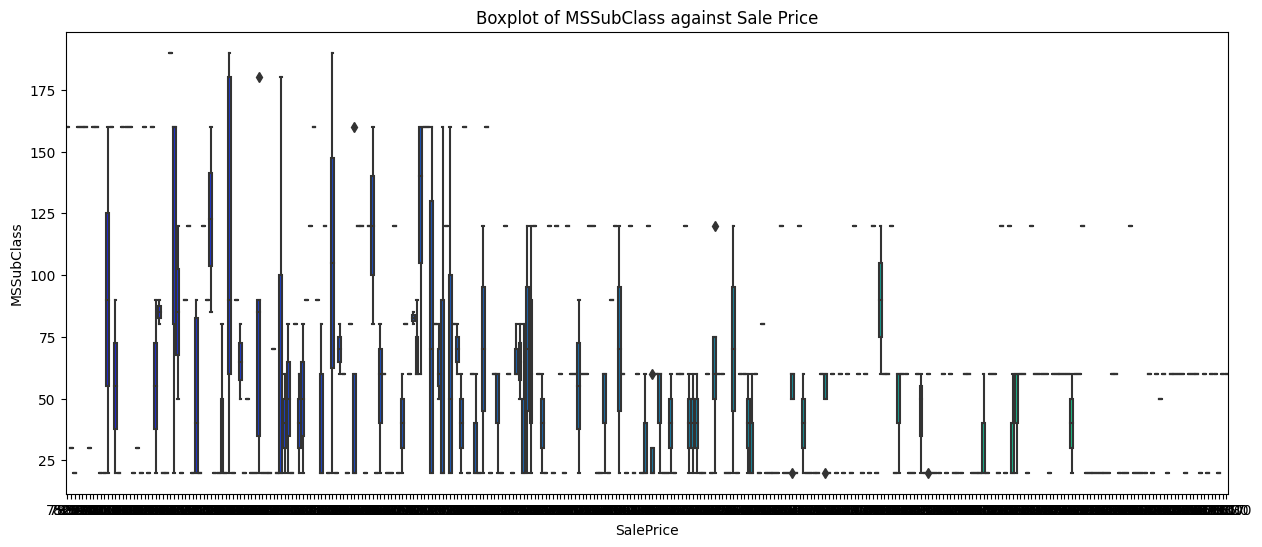

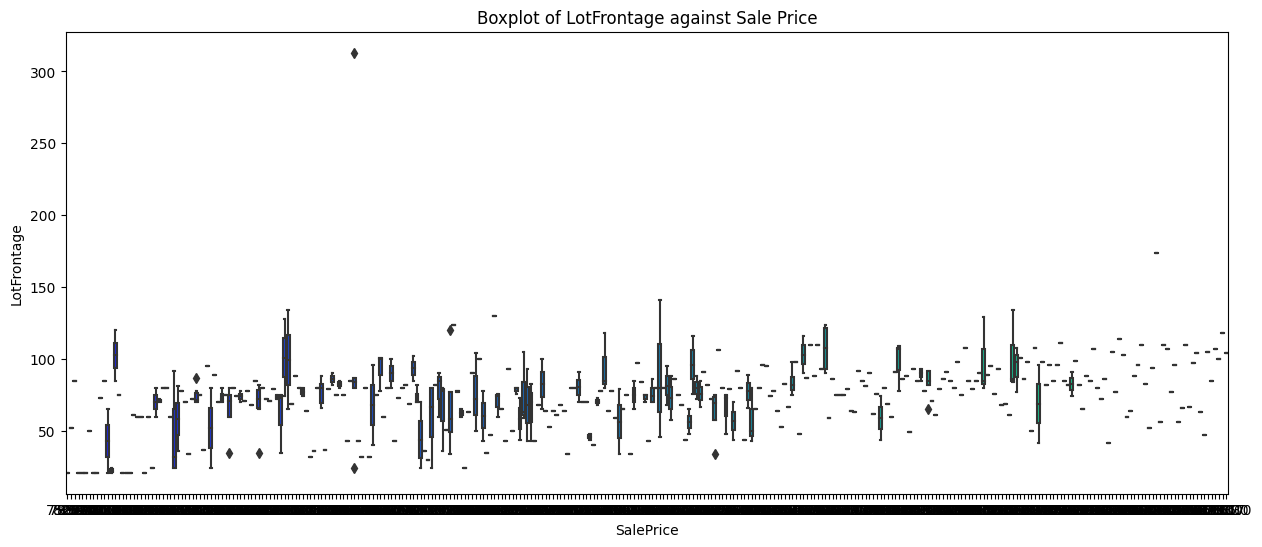

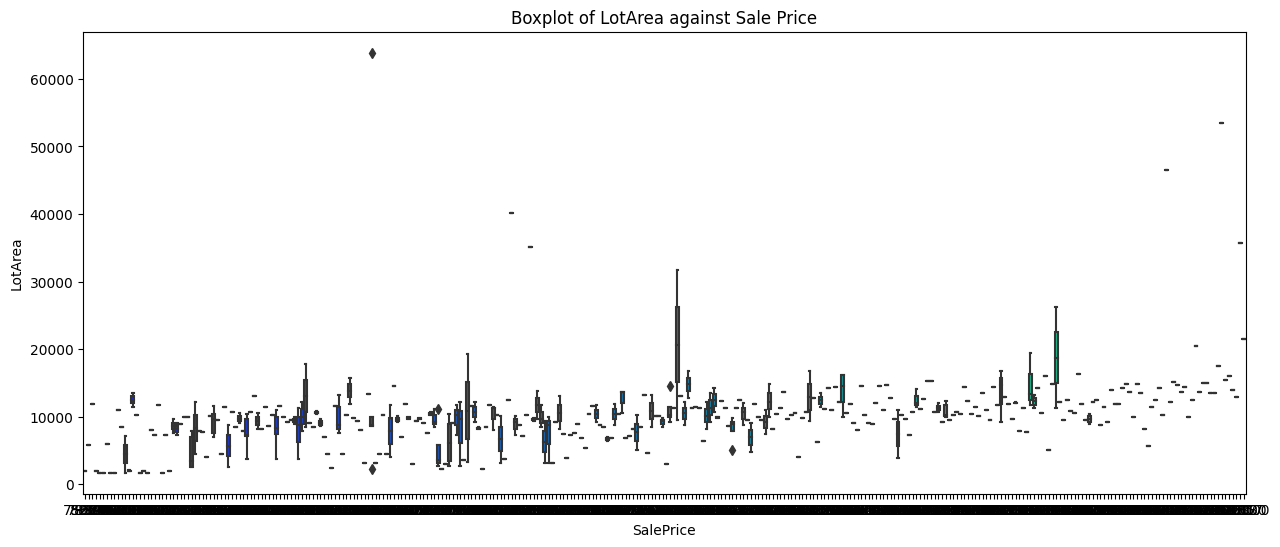

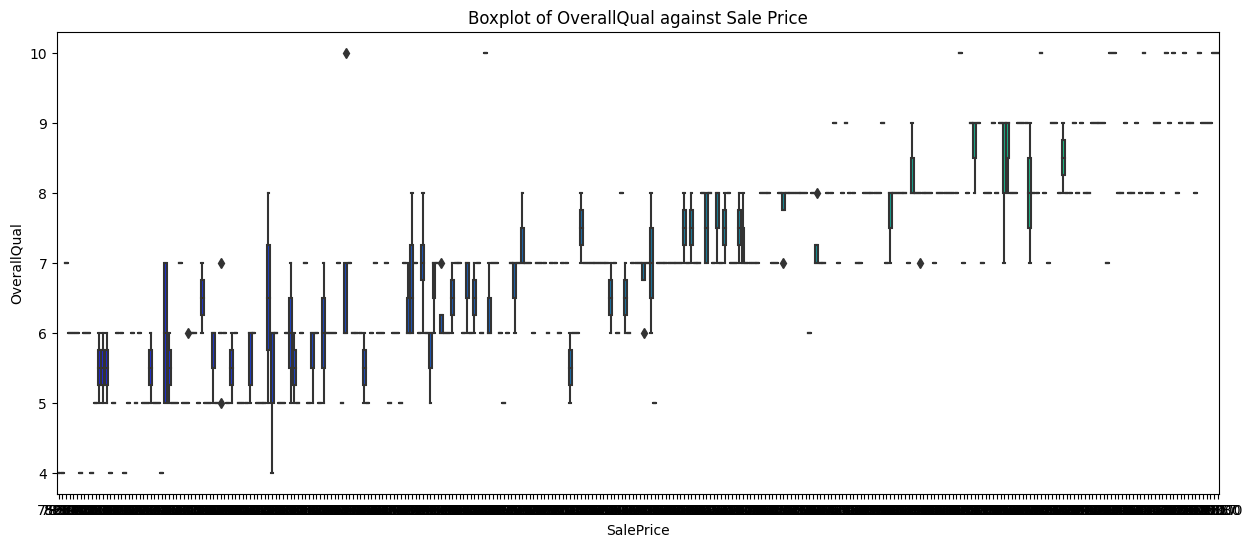

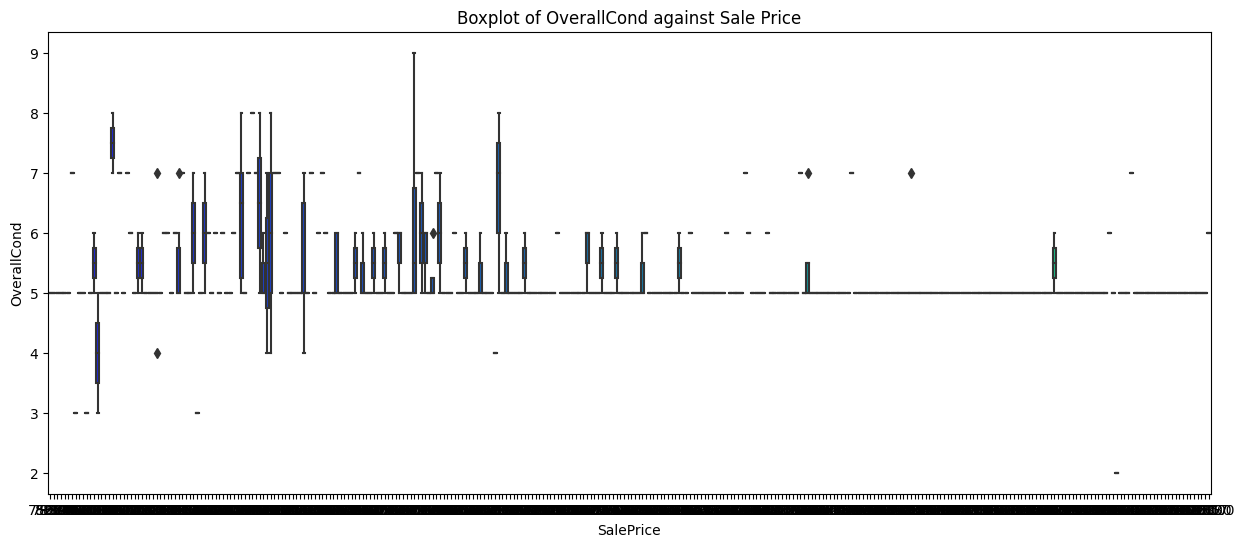

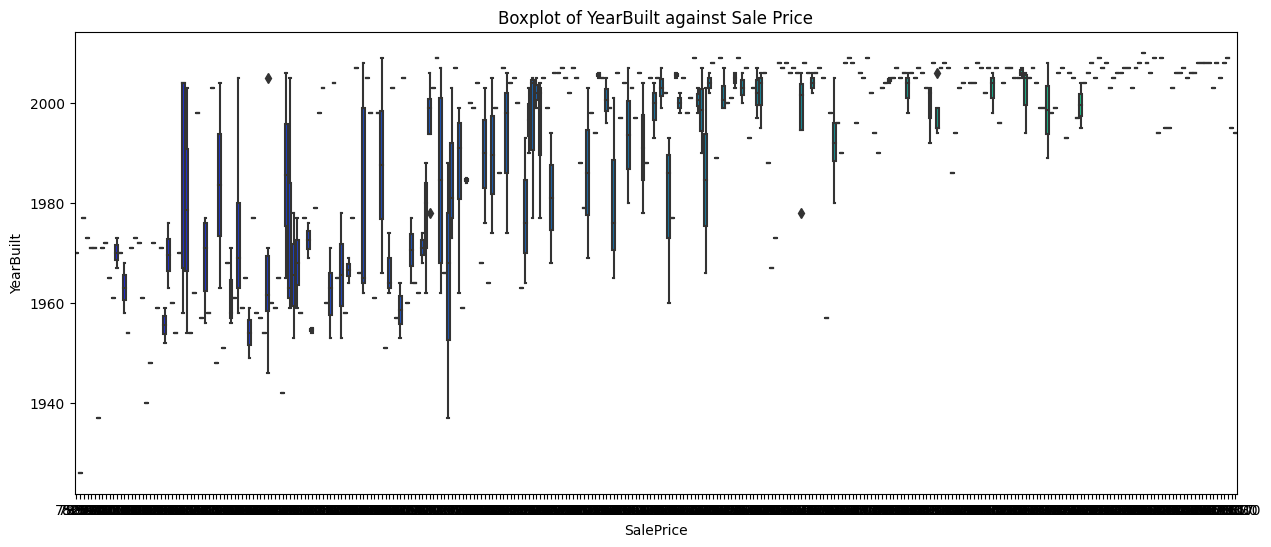

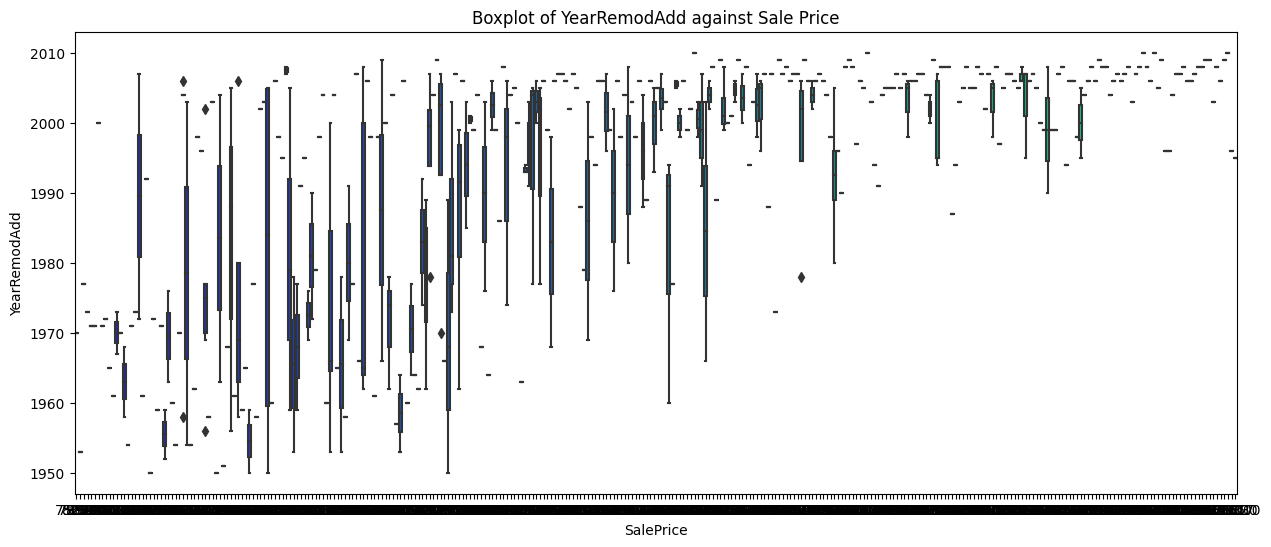

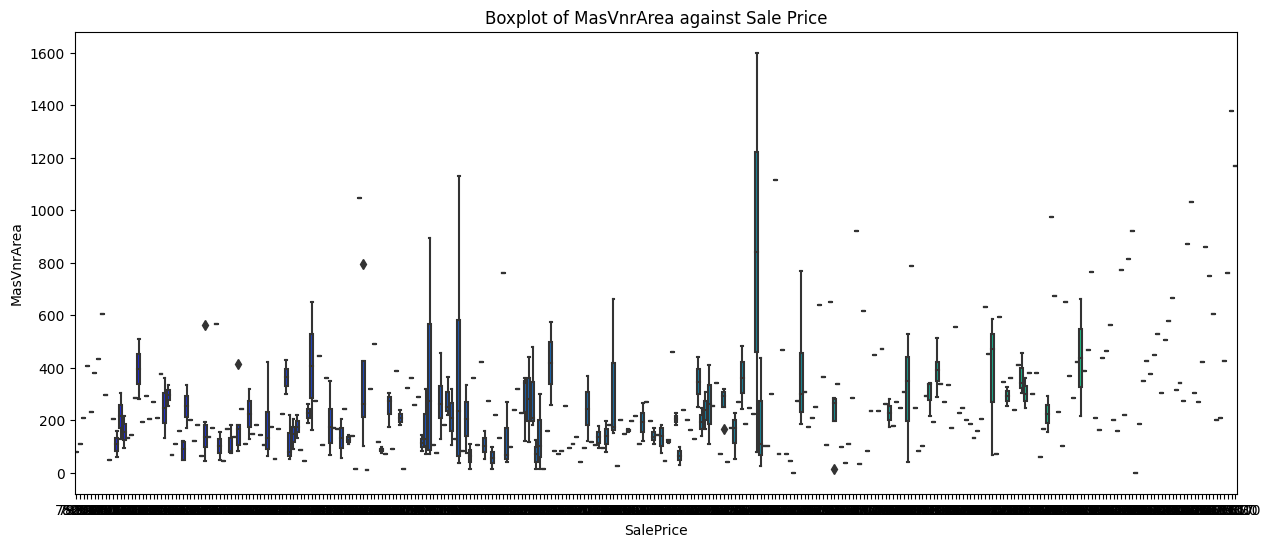

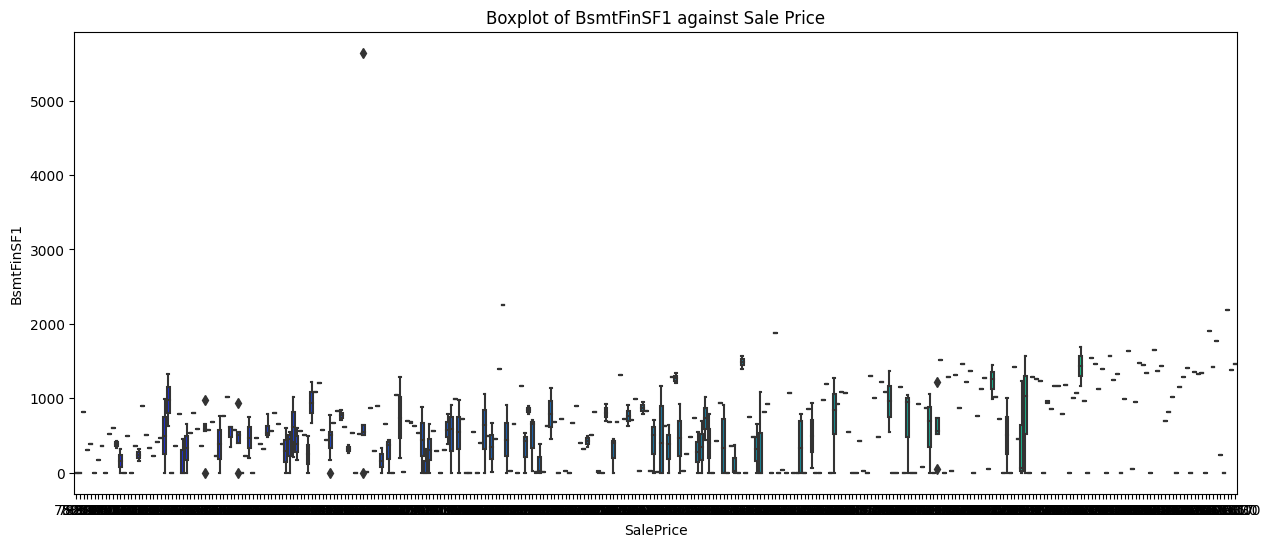

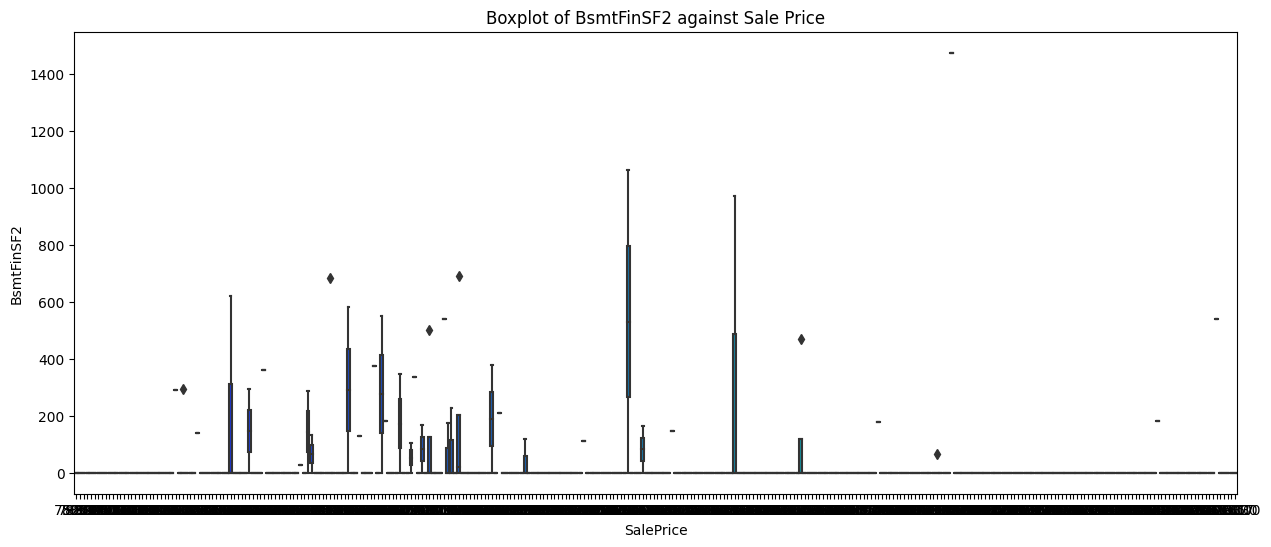

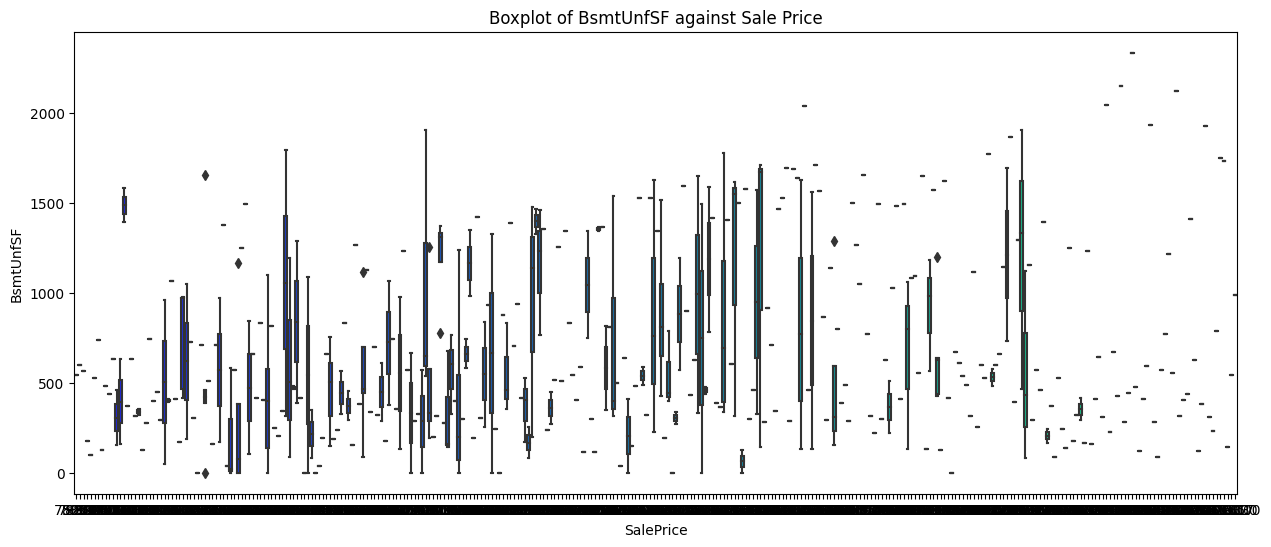

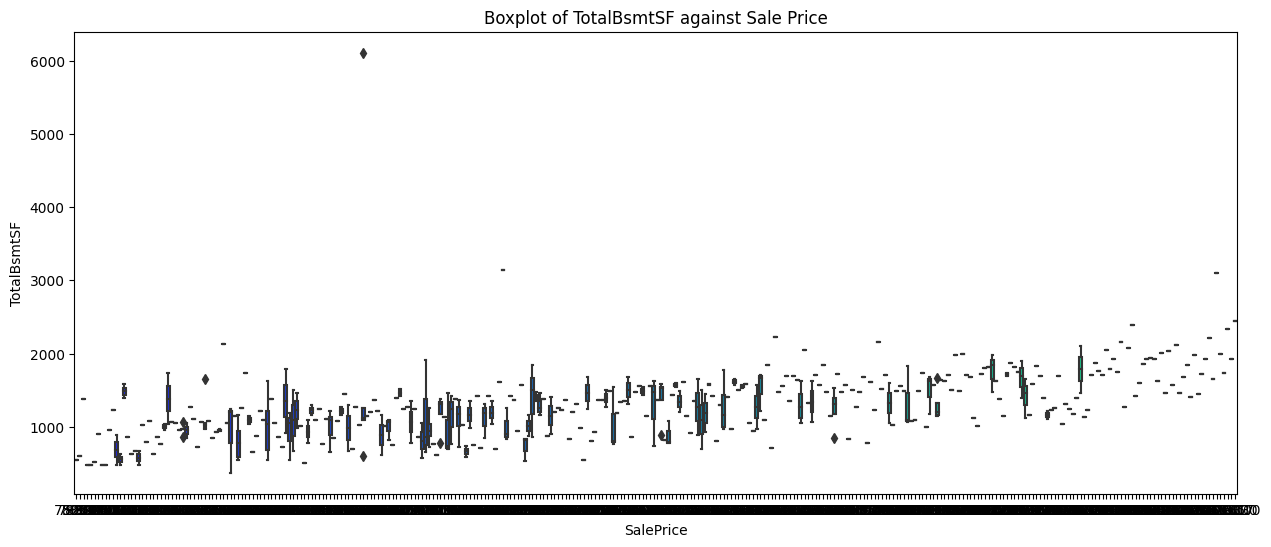

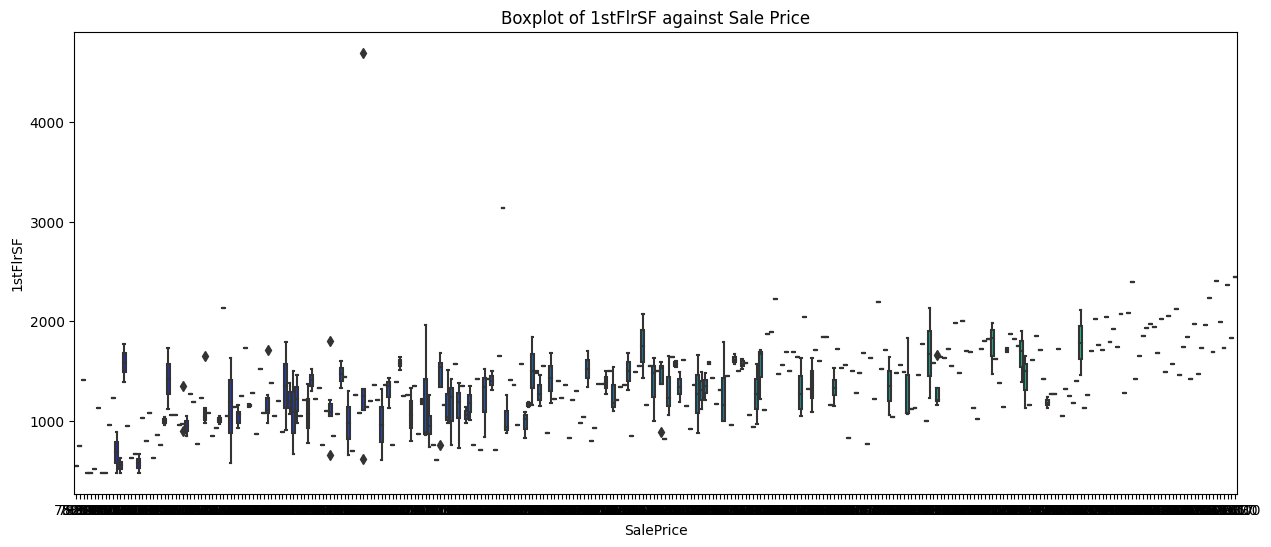

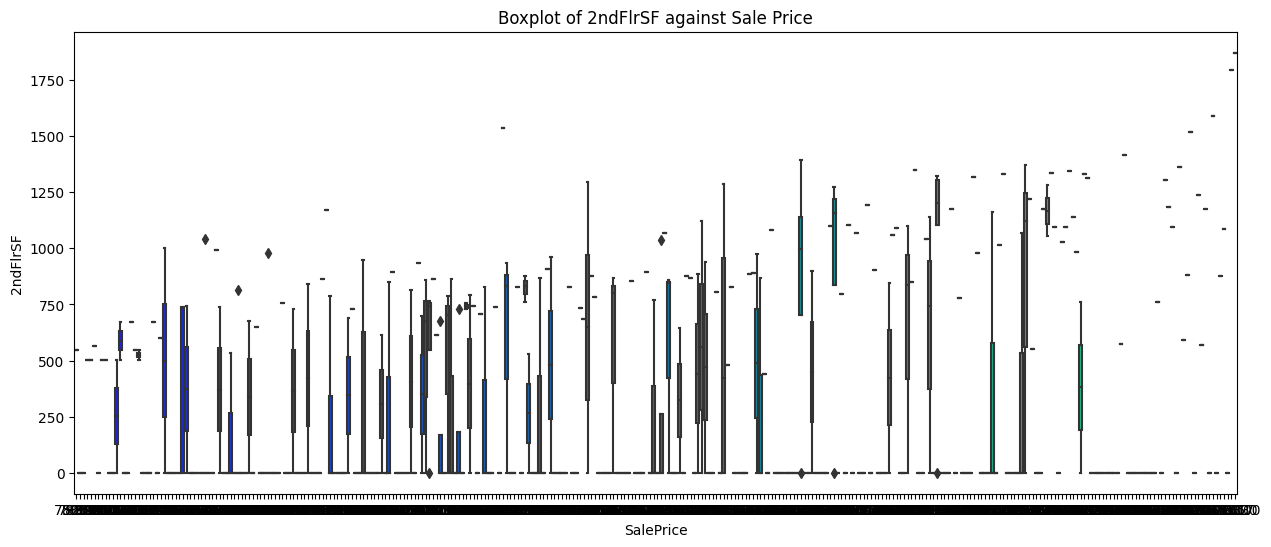

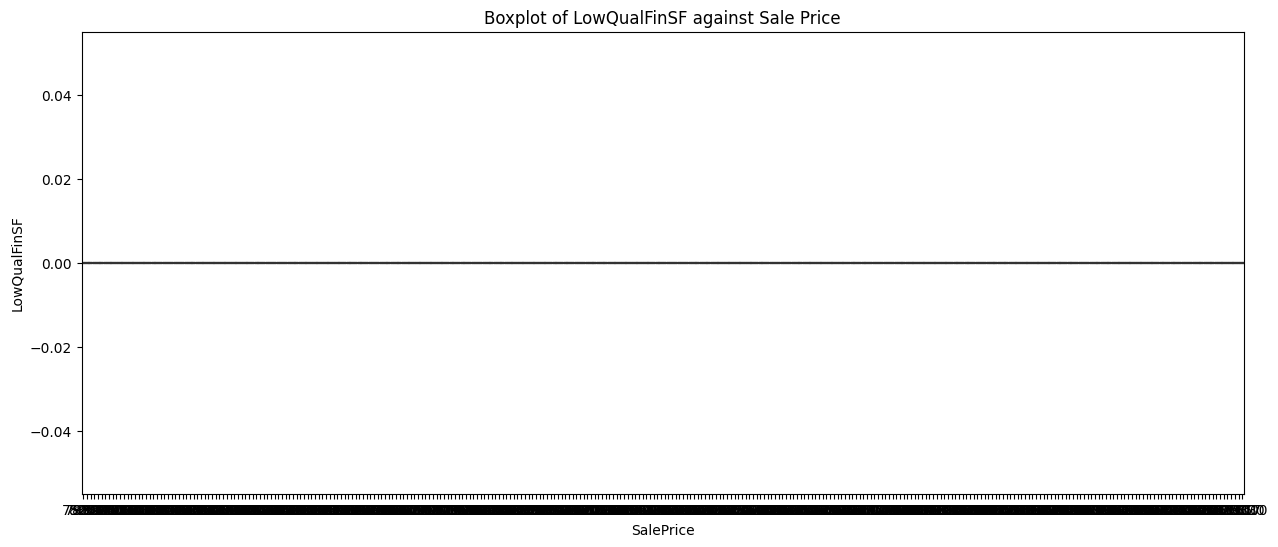

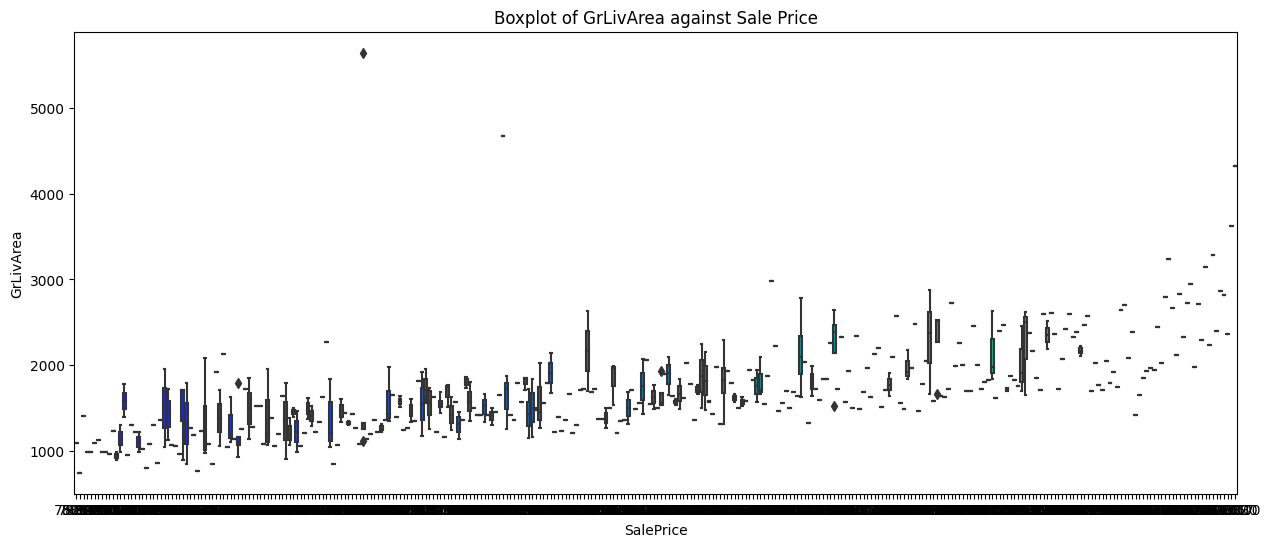

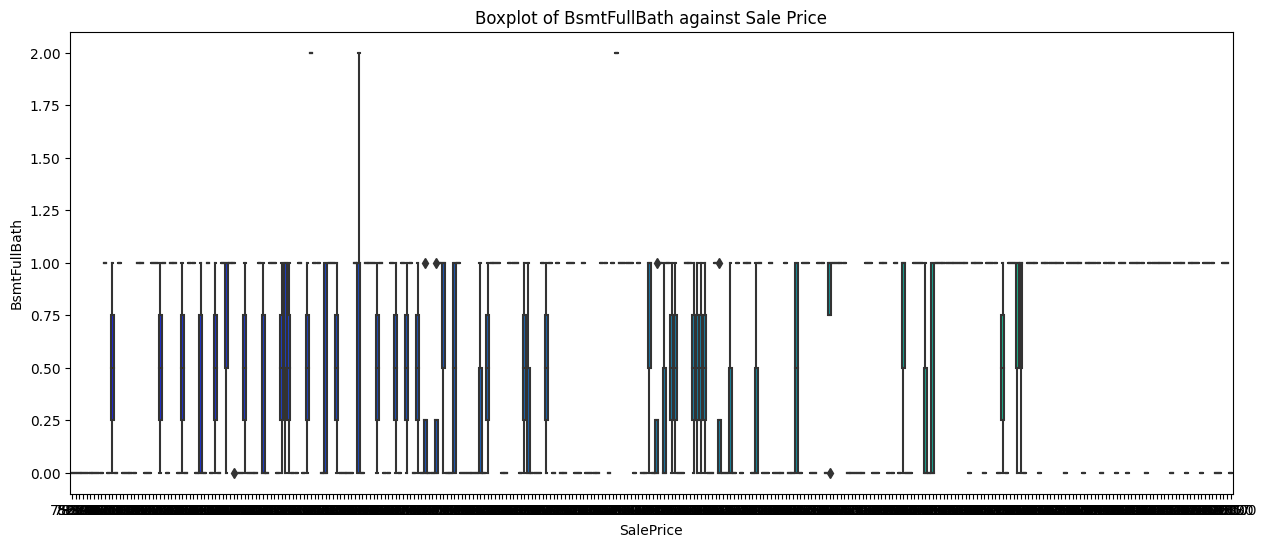

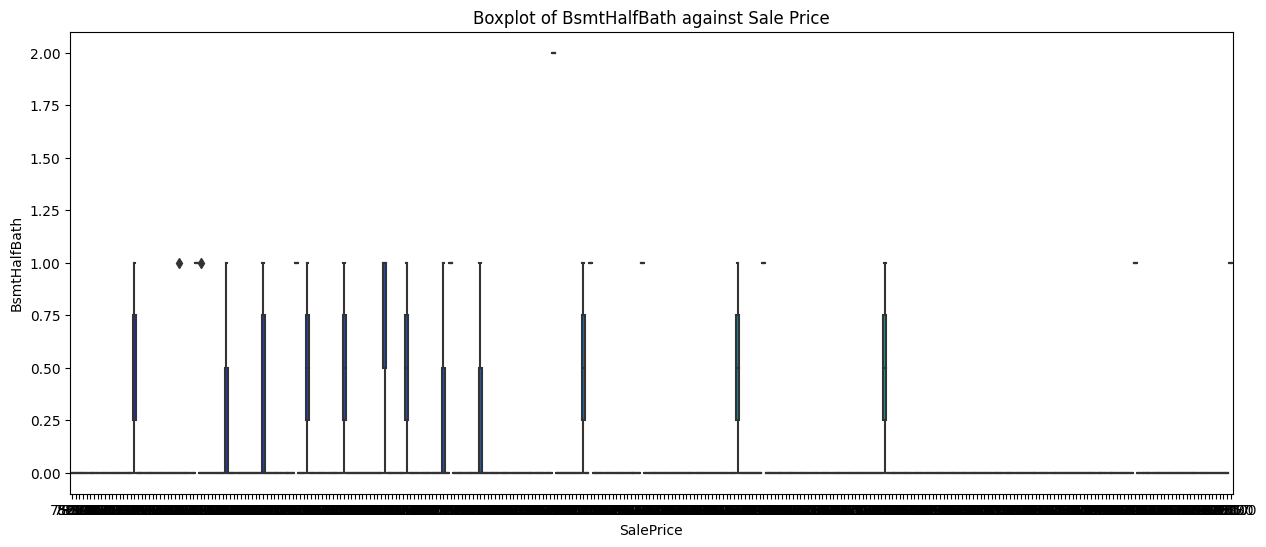

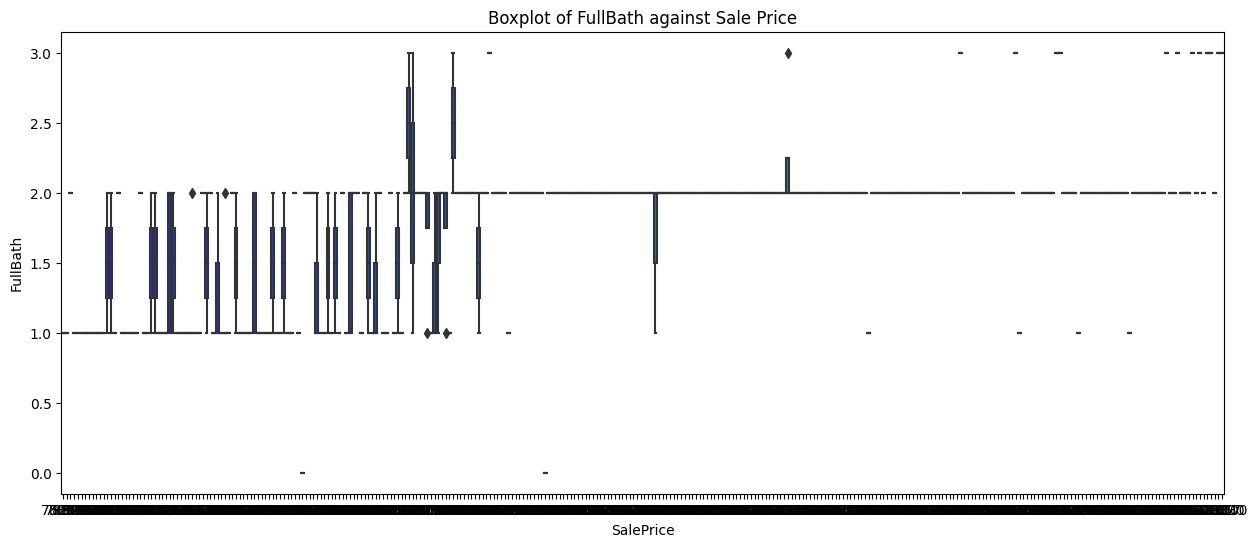

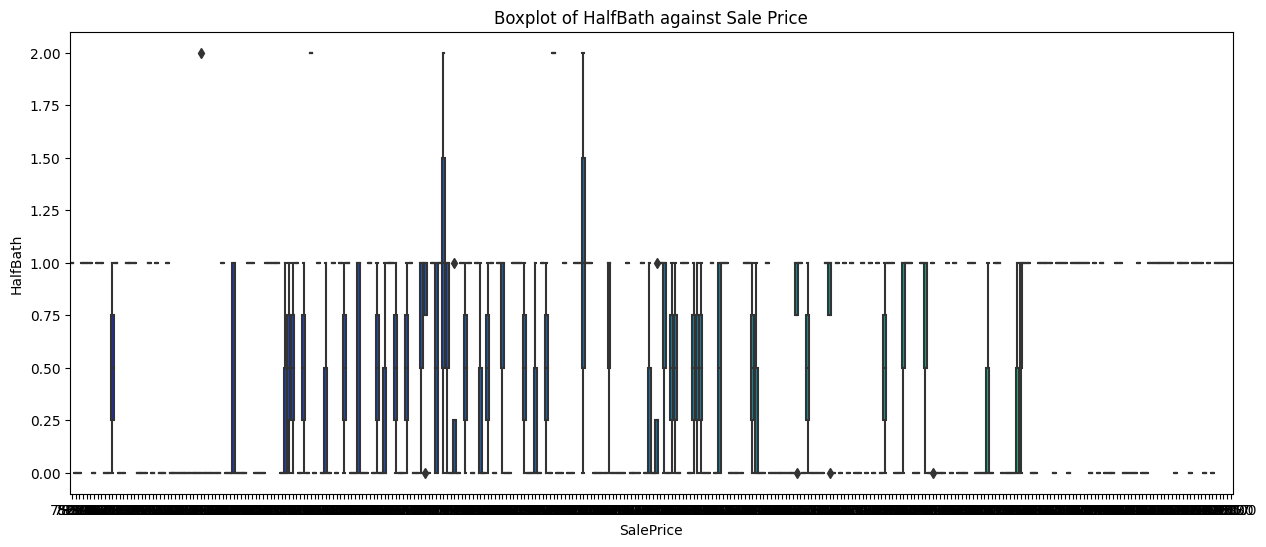

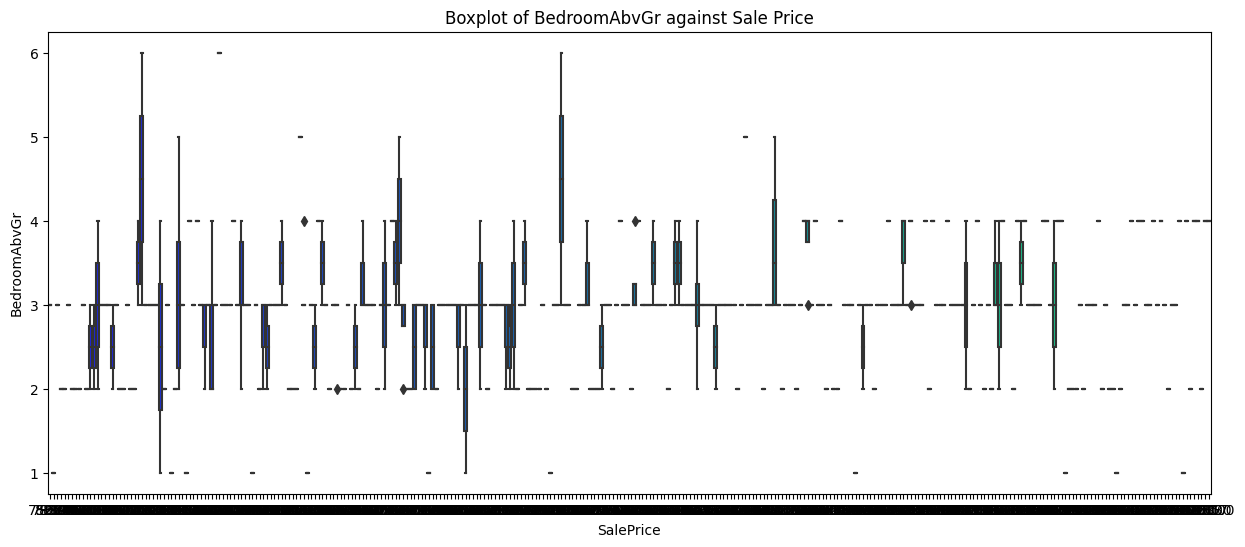

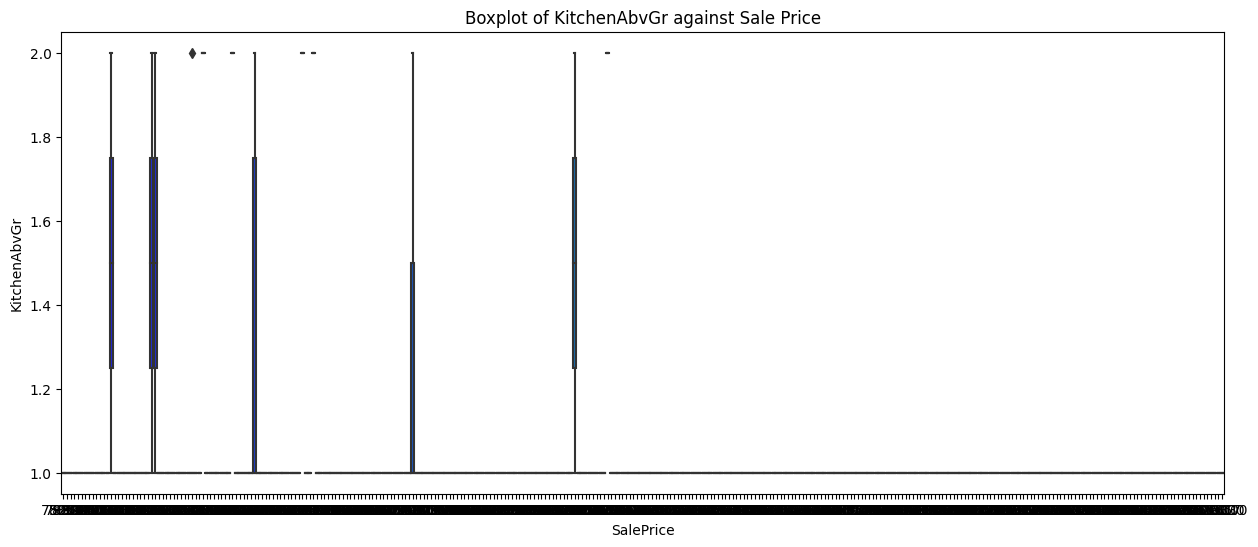

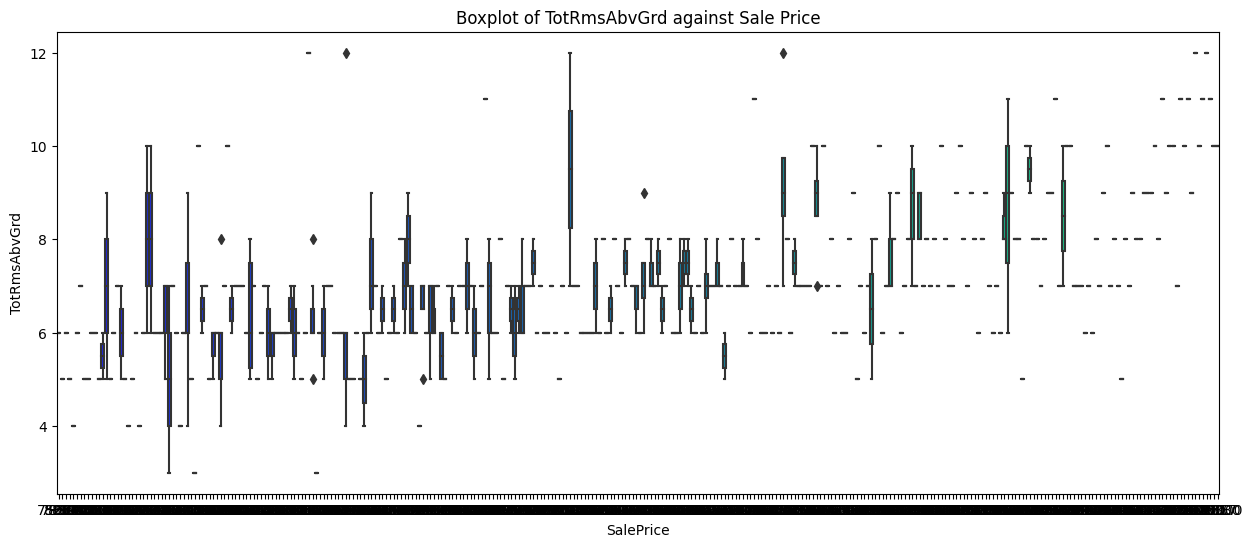

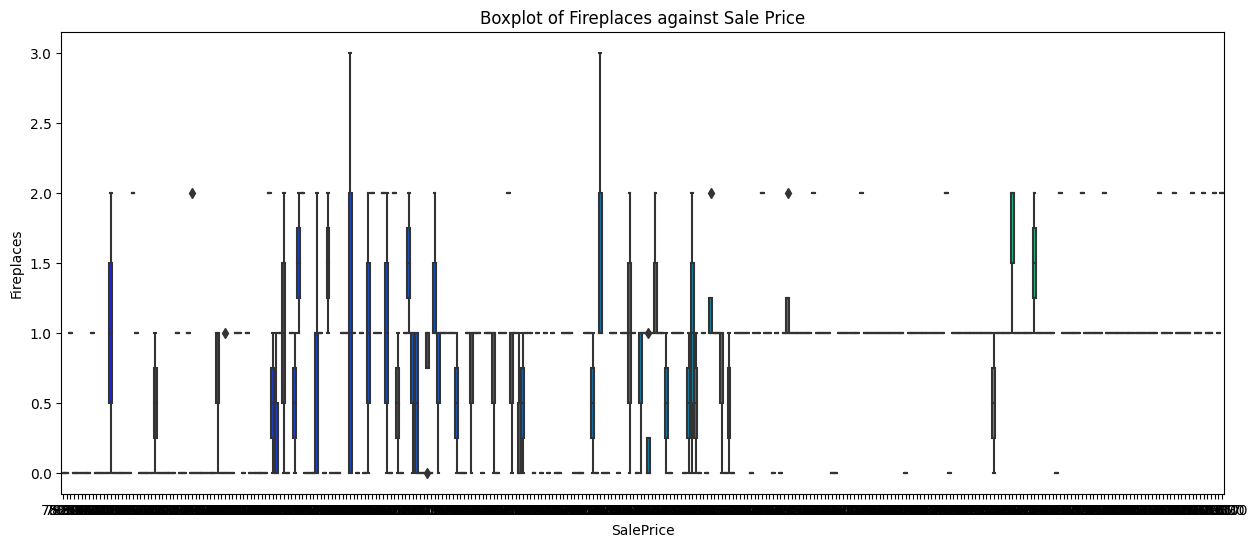

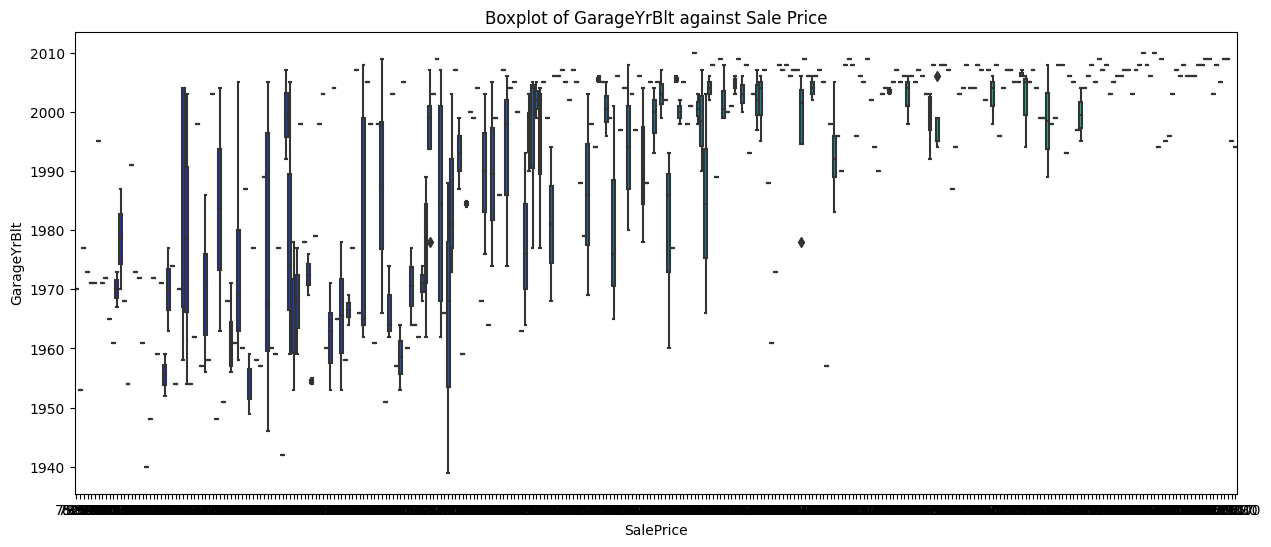

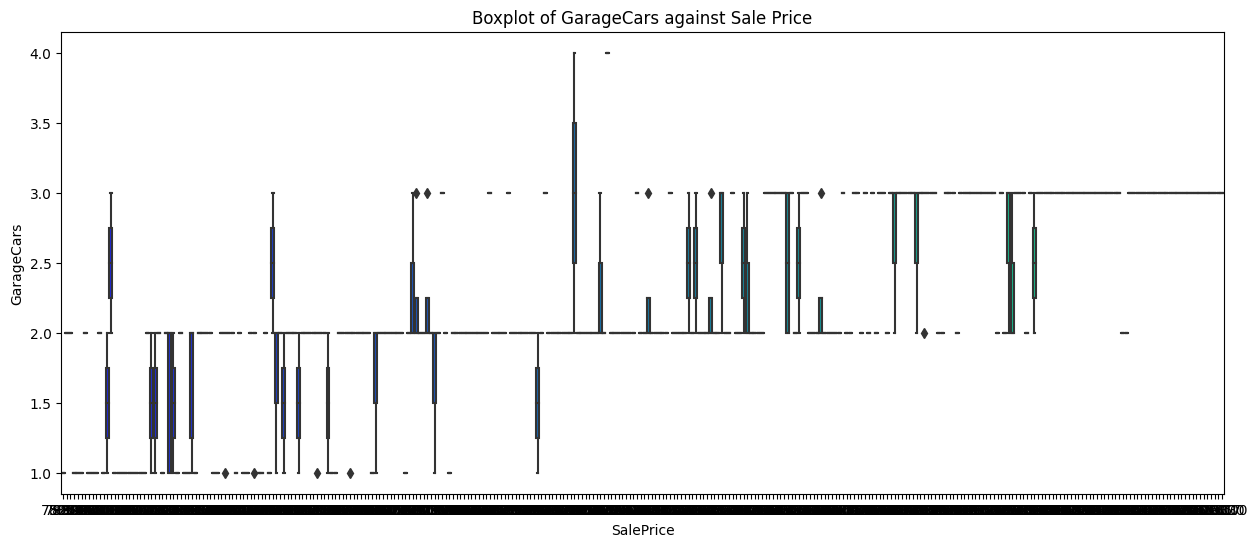

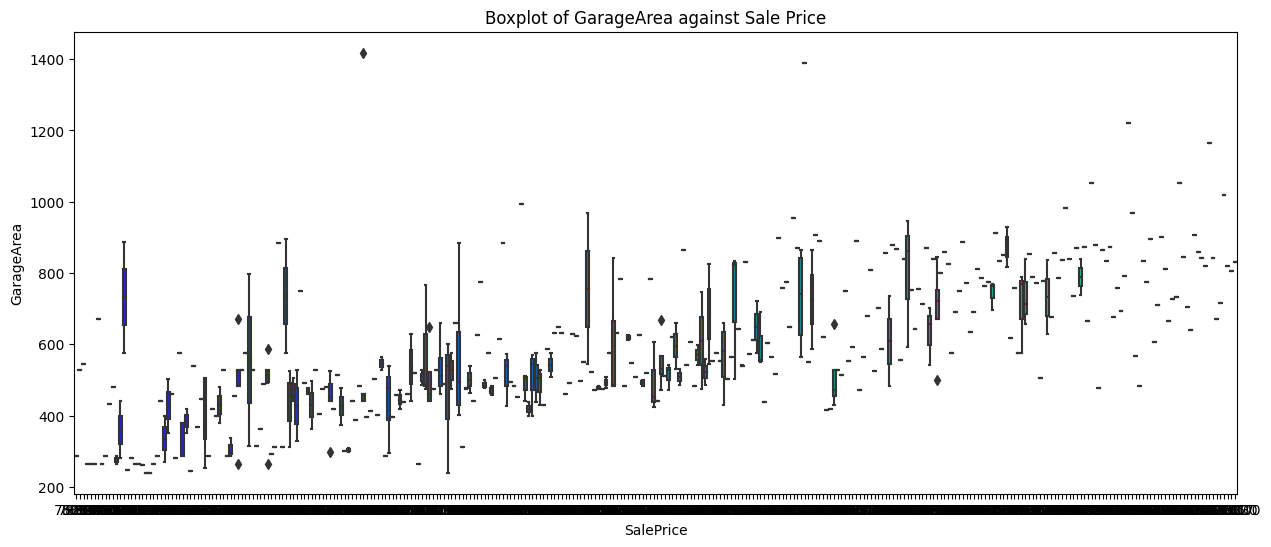

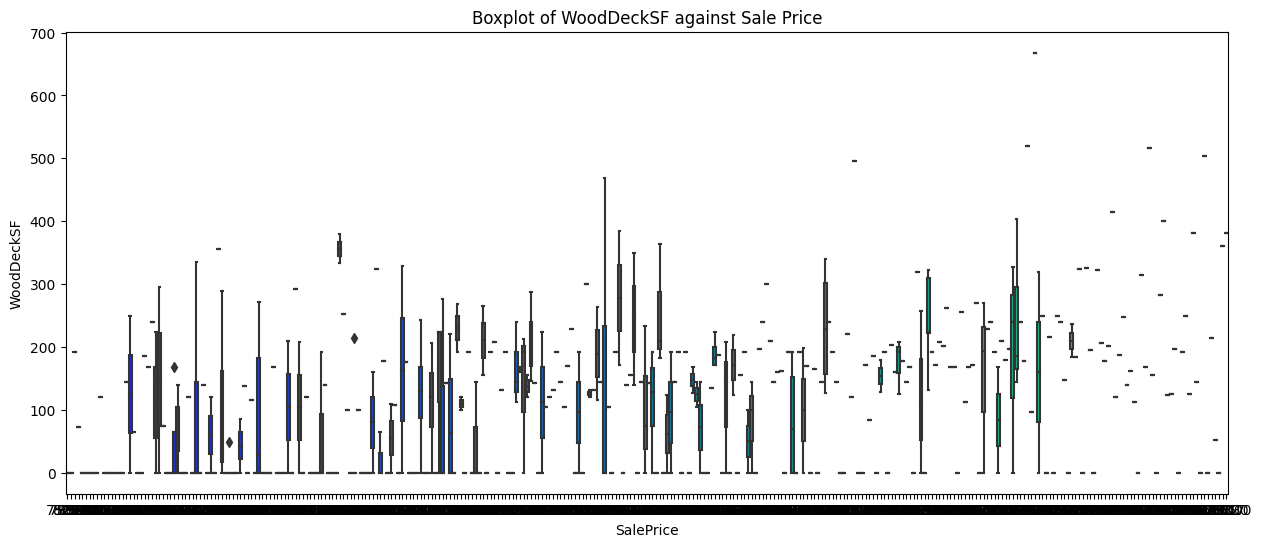

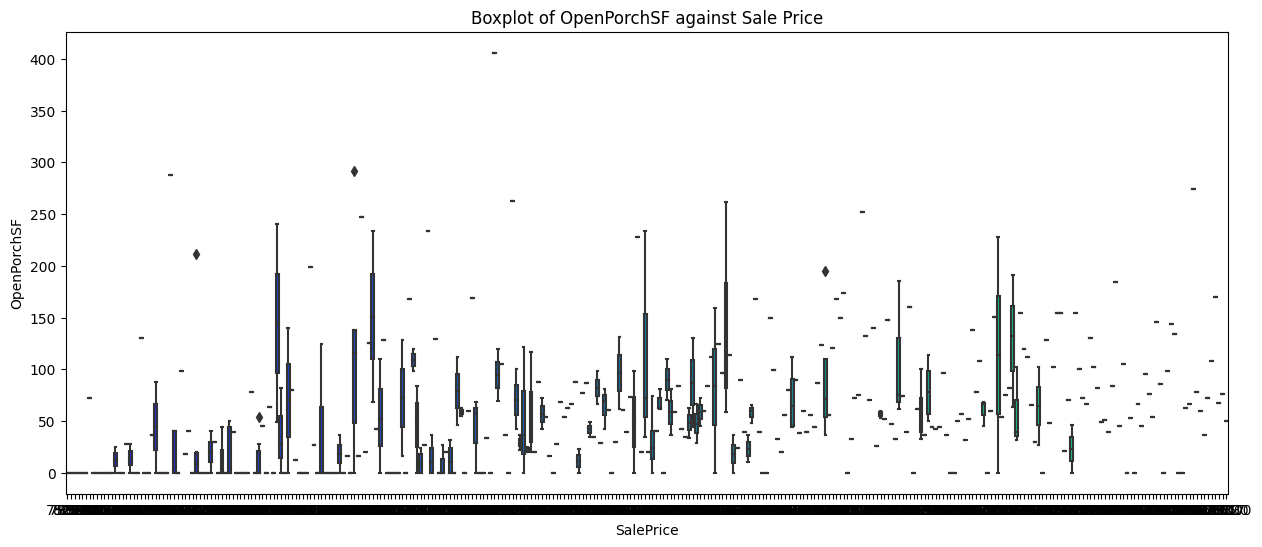

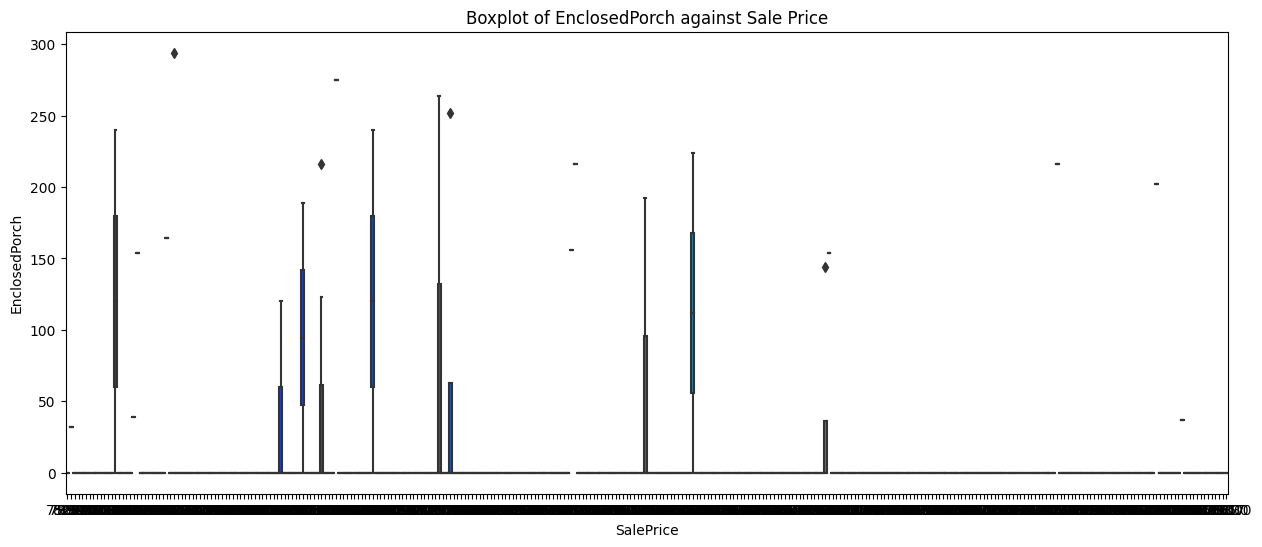

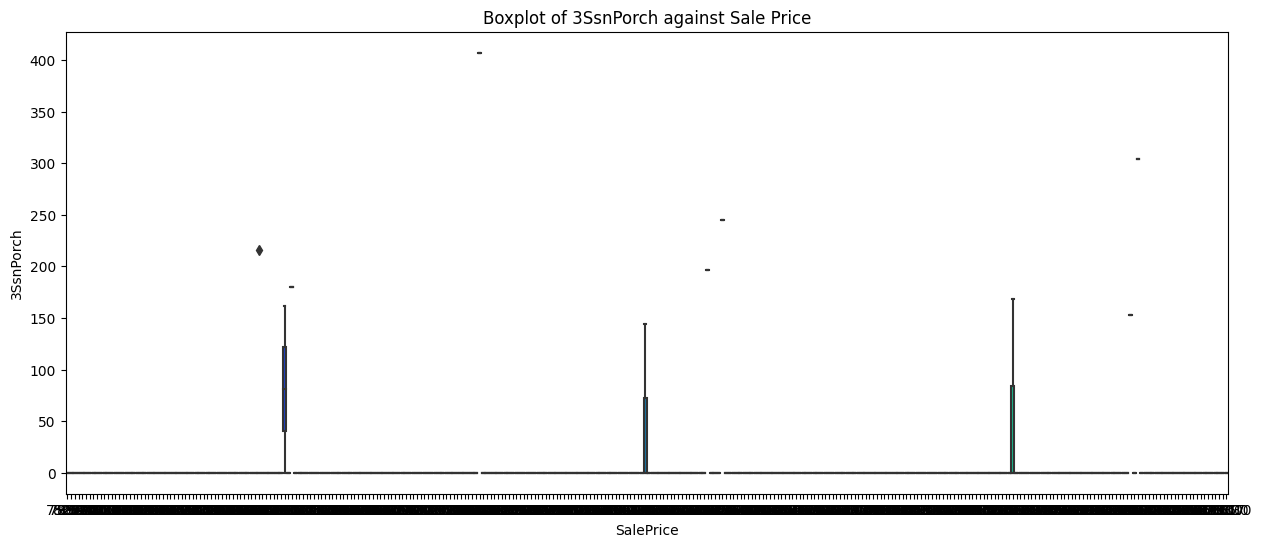

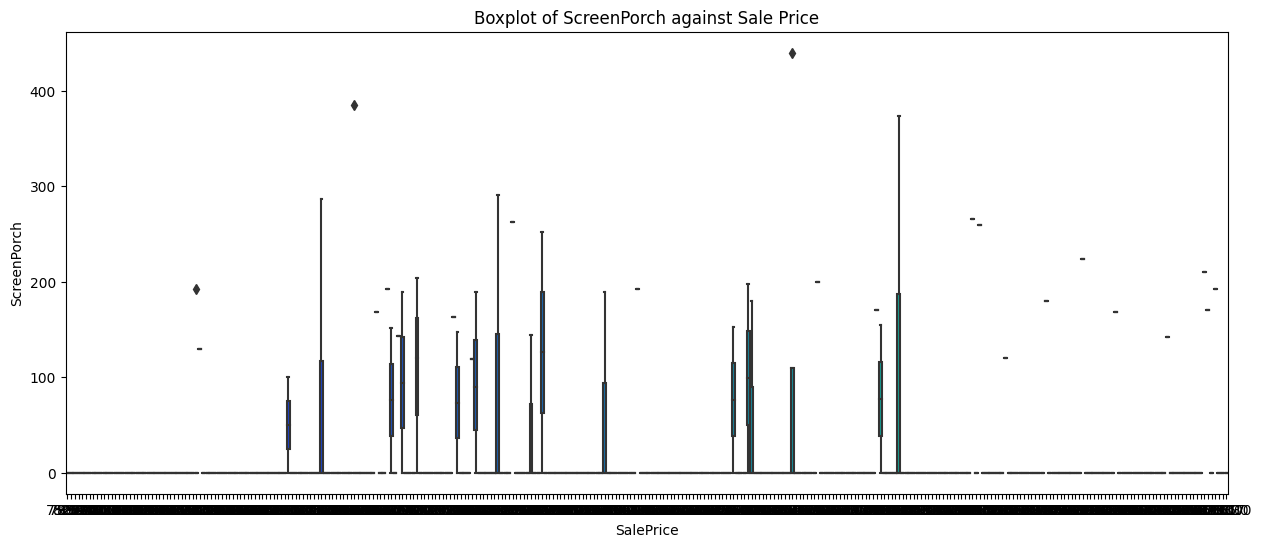

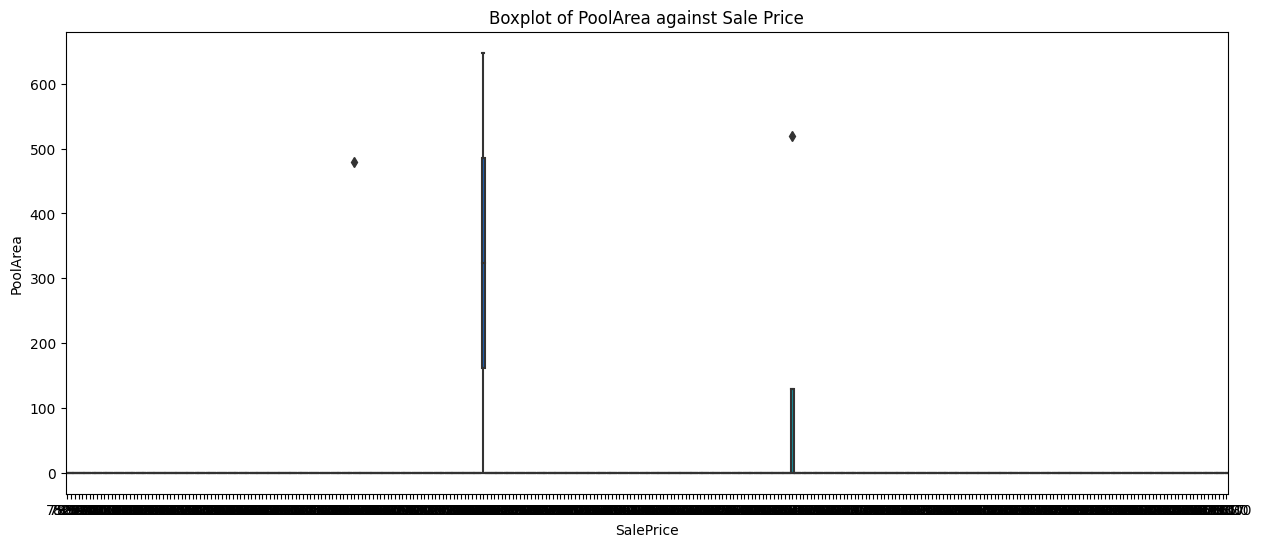

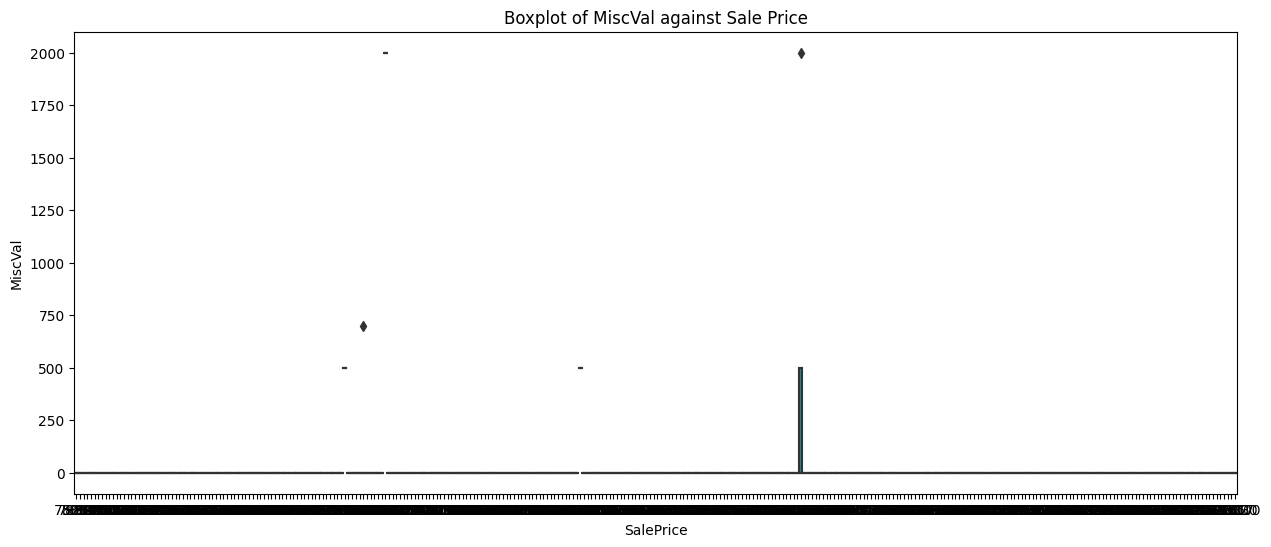

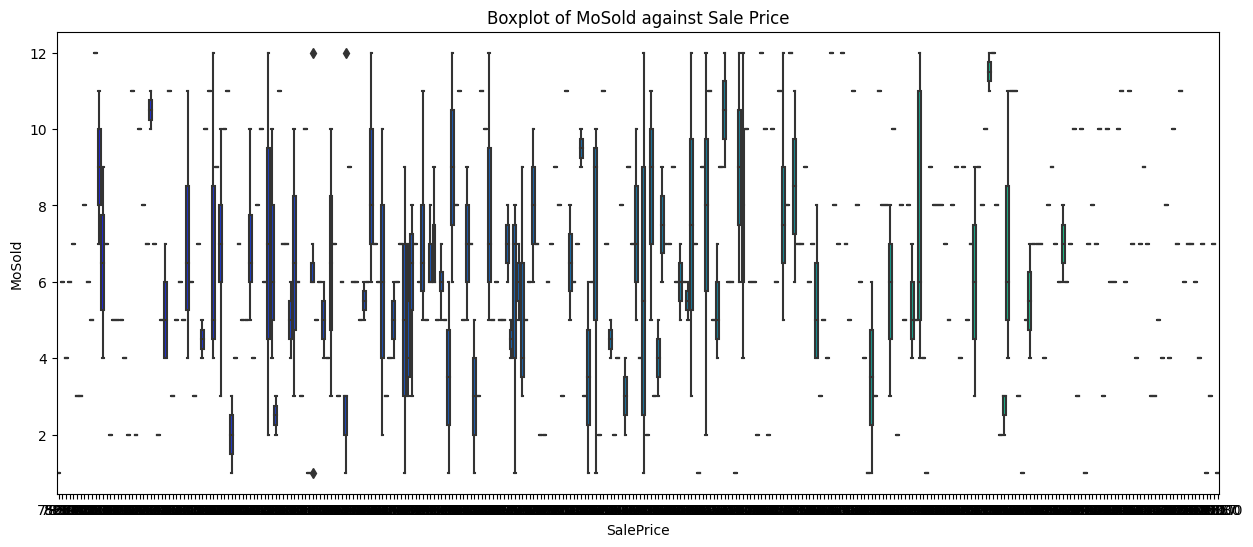

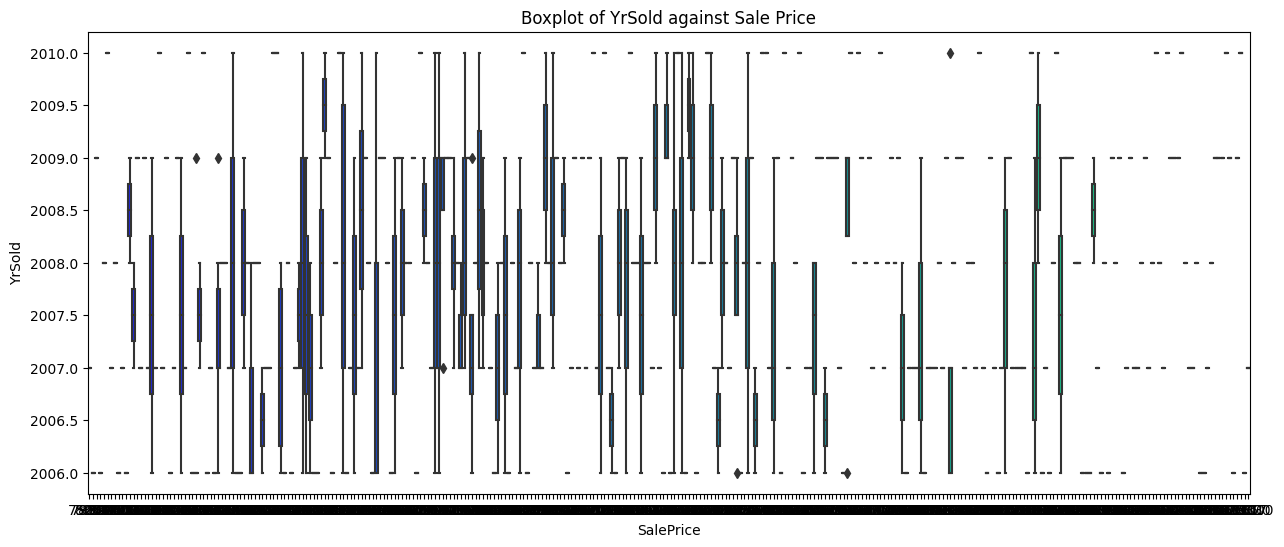

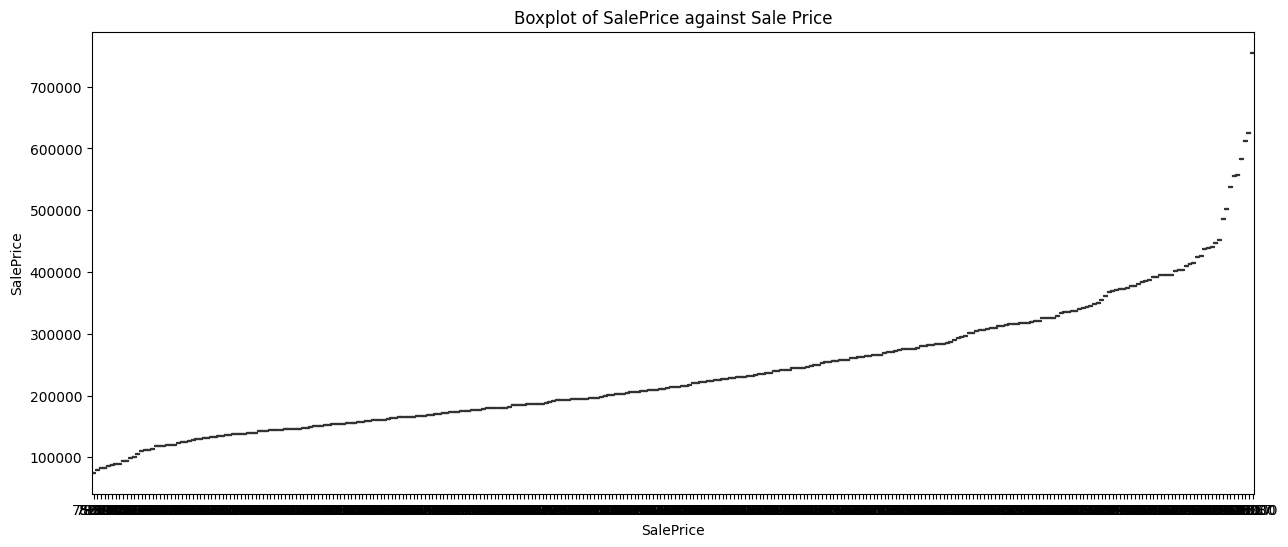

In [15]:
'''generate a series of boxplots, one for each numerical column in the dataset 
to visualize potential outliers'''
for column in numerical_columns:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x='SalePrice', y=column , data=data, palette='winter')
    plt.title(f'Boxplot of {column} against Sale Price')
    plt.show()

In [16]:
# we want to identify outliers with accurate numbers instead of depending on our observation
'''outliers are identified using IQR by checking which data points 
fall below the lower bound or above the upper bound'''

outliers_before_removal = {}
for column in numerical_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers for each column
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    outliers_before_removal[column] = outliers

# Display the outliers found before removal for each column
for column, outliers in outliers_before_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers before removal.")

Column 'MSSubClass' has 6 outliers before removal.
Column 'LotFrontage' has 36 outliers before removal.
Column 'LotArea' has 36 outliers before removal.
Column 'OverallQual' has 0 outliers before removal.
Column 'OverallCond' has 107 outliers before removal.
Column 'YearBuilt' has 0 outliers before removal.
Column 'YearRemodAdd' has 0 outliers before removal.
Column 'MasVnrArea' has 22 outliers before removal.
Column 'BsmtFinSF1' has 1 outliers before removal.
Column 'BsmtFinSF2' has 39 outliers before removal.
Column 'BsmtUnfSF' has 2 outliers before removal.
Column 'TotalBsmtSF' has 3 outliers before removal.
Column '1stFlrSF' has 3 outliers before removal.
Column '2ndFlrSF' has 0 outliers before removal.
Column 'LowQualFinSF' has 0 outliers before removal.
Column 'GrLivArea' has 12 outliers before removal.
Column 'BsmtFullBath' has 0 outliers before removal.
Column 'BsmtHalfBath' has 25 outliers before removal.
Column 'FullBath' has 0 outliers before removal.
Column 'HalfBath' has 0

In [17]:
# Example: Printing outliers found for 'GrLivArea' before removal
print("\nOutliers found for 'MSSubClass' before removal:")
print(outliers_before_removal['MSSubClass'])


Outliers found for 'MSSubClass' before removal:
      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
301          190       RL         90.0    15750   Pave      Reg         Lvl   
473          180       RM         35.0     3675   Pave      Reg         Lvl   
714          190       RL         60.0     9873   Pave      Reg         Lvl   
970          190       RL         75.0    10382   Pave      Reg         Lvl   
1298         180       RM         35.0     3675   Pave      Reg         Lvl   
1453         180       RM         35.0     3675   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
Id                                  ...                                       
301     AllPub    Corner       Gtl  ...             0         0           0   
473     AllPub    Inside       Gtl  ...             0         0           0   
71

**Handling outliers with IQR method**

In [18]:
def handle_outliers_iqr(data, columns):
    outliers_indices = []
    for column_name in columns:
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers for the current column
        outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
        outliers_indices.extend(outliers.index.tolist())

        # Handle outliers by capping them to the threshold values
        data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])
        data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])

    # Return the updated DataFrame without outliers and a list of outlier indices
    return data.drop(outliers_indices), outliers_indices

#  handling outliers using the function
# 'cleaned_data' --> contains the DataFrame with outliers handled
# 'outlier_indices' --> holds indices of removed outliers
cleaned_data, outlier_indices = handle_outliers_iqr(data[numerical_columns].copy(), numerical_columns)

In [19]:
# Accessing outliers for columns
lower_upper_bounds = {}  # Dictionary to store lower and upper bounds for columns
for column in numerical_columns:
    lower_upper_bounds[column] = (cleaned_data[column].quantile(0.25) - 1.5 * (cleaned_data[column].quantile(0.75) - cleaned_data[column].quantile(0.25)), 
                                  cleaned_data[column].quantile(0.75) + 1.5 * (cleaned_data[column].quantile(0.75) - cleaned_data[column].quantile(0.25)))

# Example: Printing lower and upper bounds for 'MSSubClass'
print("Lower bound for MSSubClass:", lower_upper_bounds['MSSubClass'][0])
print("Upper bound for MSSubClass:", lower_upper_bounds['MSSubClass'][1])


Lower bound for MSSubClass: -40.0
Upper bound for MSSubClass: 120.0


/tmp/ipykernel_19/3947995970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'])


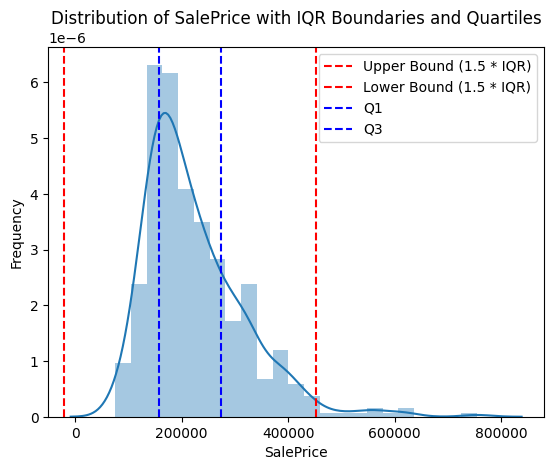

In [20]:
# plot SalePrice distribution with outlier boundaries and quartiles
sns.distplot(data['SalePrice'])
# axvline --> adds a vertical line at specific position
plt.axvline(upper_bound, color='r', linestyle='--', label='Upper Bound (1.5 * IQR)')
plt.axvline(lower_bound, color='r', linestyle='--', label='Lower Bound (1.5 * IQR)')
plt.axvline(Q1, color='b', linestyle='--', label='Q1')
plt.axvline(Q3, color='b', linestyle='--', label='Q3')

plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Distribution of SalePrice with IQR Boundaries and Quartiles')
plt.legend()
plt.show()

In [21]:
# check for outliers after removal for each column
outliers_after_removal = {}
for column in numerical_columns:
    # 'lower_upper_bounds' contains the lower and upper bounds for each column after outlier removal
    outliers_after_removal[column] = cleaned_data[(cleaned_data[column] < lower_upper_bounds[column][0]) | (cleaned_data[column] > lower_upper_bounds[column][1])]

# display the outliers found after removal for each column
for column, outliers in outliers_after_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers after removal.")

Column 'MSSubClass' has 3 outliers after removal.
Column 'LotFrontage' has 4 outliers after removal.
Column 'LotArea' has 9 outliers after removal.
Column 'OverallQual' has 12 outliers after removal.
Column 'OverallCond' has 0 outliers after removal.
Column 'YearBuilt' has 23 outliers after removal.
Column 'YearRemodAdd' has 22 outliers after removal.
Column 'MasVnrArea' has 7 outliers after removal.
Column 'BsmtFinSF1' has 0 outliers after removal.
Column 'BsmtFinSF2' has 0 outliers after removal.
Column 'BsmtUnfSF' has 0 outliers after removal.
Column 'TotalBsmtSF' has 0 outliers after removal.
Column '1stFlrSF' has 0 outliers after removal.
Column '2ndFlrSF' has 43 outliers after removal.
Column 'LowQualFinSF' has 0 outliers after removal.
Column 'GrLivArea' has 6 outliers after removal.
Column 'BsmtFullBath' has 0 outliers after removal.
Column 'BsmtHalfBath' has 0 outliers after removal.
Column 'FullBath' has 17 outliers after removal.
Column 'HalfBath' has 0 outliers after remova

In [22]:
# Example: Printing outliers found for 'GrLivArea' after removal
print("\nOutliers found for 'MSSubClass' after removal:")
print(outliers_after_removal['MSSubClass'])


Outliers found for 'MSSubClass' after removal:
      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                            
1237       160.0         36.0   2628.0          7.0          5.0     2003.0   
1266       160.0         35.0   3735.0          7.0          5.0     1999.0   
1305       160.0         32.0   3363.0          7.0          5.0     2004.0   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
Id                                                      ...               
1237        2003.0       106.0         0.0         0.0  ...         0.0   
1266        1999.0       218.0       450.0         0.0  ...         0.0   
1305        2004.0       117.0         0.0         0.0  ...         0.0   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                            
1237         27.0     

we can see from the numbers of outliers before and after IQR that numbers of outliers have been reduced but they are still there, so we will try to change the number that identify the boundaries 

In [23]:

def handle_outliers_iqr(data, columns):
    outliers_indices = []
    for column_name in columns:
        Q1 = data[column_name].quantile(0.25)
        Q3 = data[column_name].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 0.1 * IQR
        upper_bound = Q3 + 0.1 * IQR
        
        # Identify outliers for the current column
        outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]
        outliers_indices.extend(outliers.index.tolist())

        # Handle outliers by capping them to the threshold values
        data[column_name] = np.where(data[column_name] < lower_bound, lower_bound, data[column_name])
        data[column_name] = np.where(data[column_name] > upper_bound, upper_bound, data[column_name])

    # Return the updated DataFrame without outliers and a list of outlier indices
    return data.drop(outliers_indices), outliers_indices

# Handling outliers using the function
cleaned_data, outlier_indices = handle_outliers_iqr(data[numerical_columns].copy(), numerical_columns)

In [24]:
# Check for outliers post-removal for each column
outliers_after_removal = {}
for column in numerical_columns:
    outliers_after_removal[column] = cleaned_data[(cleaned_data[column] < lower_upper_bounds[column][0]) | (cleaned_data[column] > lower_upper_bounds[column][1])]

# Display the outliers found after removal for each column
for column, outliers in outliers_after_removal.items():
    print(f"Column '{column}' has {len(outliers)} outliers after removal.")

# Example: Printing outliers found for 'MSSubClass' after removal
print("\nOutliers found for 'MSSubClass' after removal:")
print(outliers_after_removal['MSSubClass'])


'''Outliers almost disappeared'''

Column 'MSSubClass' has 0 outliers after removal.
Column 'LotFrontage' has 0 outliers after removal.
Column 'LotArea' has 0 outliers after removal.
Column 'OverallQual' has 0 outliers after removal.
Column 'OverallCond' has 0 outliers after removal.
Column 'YearBuilt' has 2 outliers after removal.
Column 'YearRemodAdd' has 2 outliers after removal.
Column 'MasVnrArea' has 0 outliers after removal.
Column 'BsmtFinSF1' has 0 outliers after removal.
Column 'BsmtFinSF2' has 0 outliers after removal.
Column 'BsmtUnfSF' has 0 outliers after removal.
Column 'TotalBsmtSF' has 0 outliers after removal.
Column '1stFlrSF' has 0 outliers after removal.
Column '2ndFlrSF' has 0 outliers after removal.
Column 'LowQualFinSF' has 0 outliers after removal.
Column 'GrLivArea' has 0 outliers after removal.
Column 'BsmtFullBath' has 0 outliers after removal.
Column 'BsmtHalfBath' has 0 outliers after removal.
Column 'FullBath' has 0 outliers after removal.
Column 'HalfBath' has 0 outliers after removal.
Co

'Outliers almost disappeared'

**Test if 'SalePrice' follows a normal distribution using a statistical test from Scipy.**

In [25]:
# select the 'SalePrice' column from the dataset and stores it in the variable SalePrice_data
SalePrice_data = data['SalePrice']

# execute the Shapiro-Wilk test using SciPy's stats.shapiro() function
# it calculates the test statistic and the corresponding p-value for the 'SalePrice' data
statistic, p_value = stats.shapiro(SalePrice_data)

# print out the test statistic and the p-value obtained from the Shapiro-Wilk test
print(f"Shapiro-Wilk Test Statistic: {statistic}")
print(f"P-value: {p_value}")

# set a significance level (0.05) to interpret the results
'''If the p-value is greater than 0.05, it prints that the 'SalePrice' data follows a normal distribution 
(fails to reject the null hypothesis H0). otherwise, it prints that the 'SalePrice' data doesn't follow 
a normal distribution (rejects the null hypothesis H0)'''
alpha = 0.05
if p_value > alpha:
    print("SalePrice follows a normal distribution (fail to reject H0)")
else:
    print("SalePrice does not follow a normal distribution (reject H0)")
    

Shapiro-Wilk Test Statistic: 0.8937142491340637
P-value: 3.191255193167945e-17
SalePrice does not follow a normal distribution (reject H0)


**Investigate significant differences between the means of 'OverallQual' for houses with and without 'CentralAir' using a suitable statistical test**

In [26]:
'''To investigate significant differences between the means of 'OverallQual' for houses 
with and without 'CentralAir', we can use a t-test,
assuming the data meets the assumptions required for this test.'''

# First, we'll need to split the data into two groups based on the presence or absence of 'CentralAir'
# and then compare the means of 'OverallQual' between these groups.
with_central_air = data[data['CentralAir'] == 'Y']['OverallQual']
without_central_air = data[data['CentralAir'] == 'N']['OverallQual']

# Second, perform a t-test assuming unequal variances (Welch's t-test)
t_statistic, p_value = stats.ttest_ind(with_central_air, without_central_air, equal_var=False)

# Print the results
print(f"T-test Statistic: {t_statistic}")
print(f"P-value: {p_value}")

'''If the p-value is less than the significance level (0.05), 
we would conclude that there is a significant difference in 'OverallQual' means between the two groups'''
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference between the means of 'OverallQual' for houses with and without CentralAir.")
else:
    print("There is no significant difference between the means of 'OverallQual' for houses with and without CentralAir.")

T-test Statistic: 4.656167922064378
P-value: 0.016904505365380317
There is a significant difference between the means of 'OverallQual' for houses with and without CentralAir.


# Data Visualization

**Create a histogram of 'SalePrice' using Matplotlib and draw insights from the distribution**

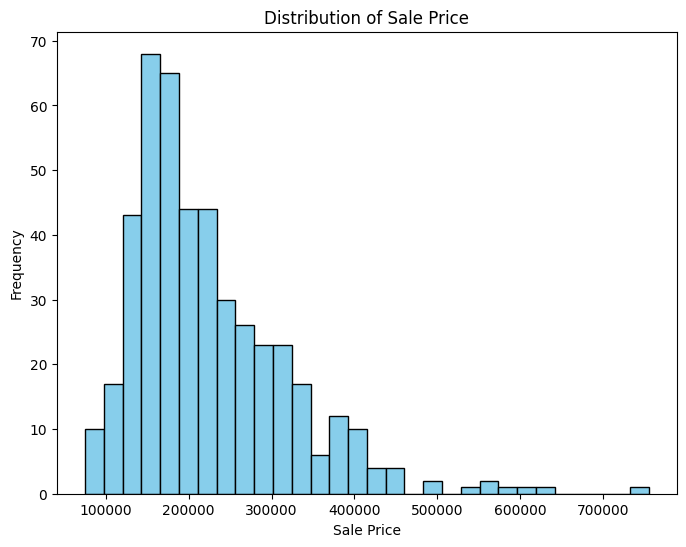

In [27]:
# Create a histogram of 'SalePrice'
plt.figure(figsize=(8, 6))
plt.hist(data['SalePrice'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.title('Distribution of Sale Price')
plt.grid(False)
plt.show()

1)Central Tendency: shows us that sale price skewed towards 200000 (not symmetric distribution).

2)Spread: there is variation in sale prices within the dataset from less than 100000 to more that 700000.

3)Shape: shape of the distribution is skewed.

4)Frequency: high frequencies around 200000 indicate that is is a popular price point or common sales.

5)Outliers: we can see that lowest frequencies from less than 500000 to more than 700000

                     '''We can use some functions to produce accurate numbers rather than our observation.'''

Mean Sale Price: 179000.00
Median Sale Price: 180000.00
Skewness of Sale Price: -0.03
Range of Sale Price: 680000.00
IQR of Sale Price: 117950.00
Mode of Sale Price: [155000]
Potential outliers in 'SalePrice':
      MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
Id                                                                            
179           20       RL         63.0    17423   Pave      IR1         Lvl   
441           20       RL        105.0    15431   Pave      Reg         Lvl   
592           60       RL         97.0    13478   Pave      IR1         Lvl   
692           60       RL        104.0    21535   Pave      IR1         Lvl   
770           60       RL         47.0    53504   Pave      IR2         HLS   
799           60       RL        104.0    13518   Pave      Reg         Lvl   
804           60       RL        107.0    13891   Pave      Reg         Lvl   
899           20       RL        100.0    12919   Pave      IR1         Lvl   


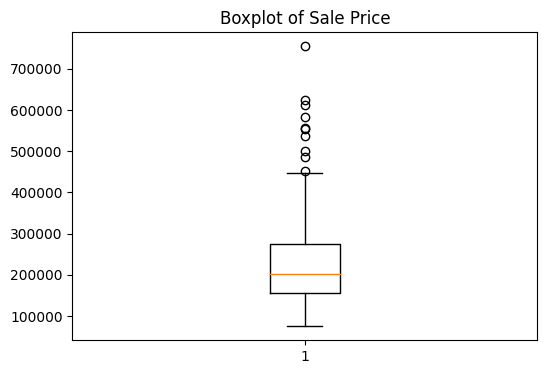

In [28]:
# Analyzing insights from the distribution

# Central Tendency
# average sale price
sale_price_mean = cleaned_data['SalePrice'].mean()
print(f"Mean Sale Price: {sale_price_mean:.2f}")
# middle value of the sale prices, separating the higher and lower halves.
sale_price_median = cleaned_data['SalePrice'].median()
print(f"Median Sale Price: {sale_price_median:.2f}")

# Shape
# a positive or negative skewness value quantifies the degree and direction of skewness.
sale_price_skewness = cleaned_data['SalePrice'].skew()
print(f"Skewness of Sale Price: {sale_price_skewness:.2f}")

# Spread   
# Peak-to-Peak function(computes the difference between the maximum and minimum values)
price_range = np.ptp(data['SalePrice']) 
# Calculate quartiles
'''finding the difference between the 75th percentile (q3 and the 25th percentile (q1).
It represents the range of the middle 50% of the data'''
q1 = np.percentile(data['SalePrice'], 25)
q3 = np.percentile(data['SalePrice'], 75)
# Calculate IQR 
iqr = q3 - q1
print(f"Range of Sale Price: {price_range:.2f}")
print(f"IQR of Sale Price: {iqr:.2f}")

# Frequency
# mode() function from Pandas, which identifies the most frequent values in the 'SalePrice' column
mode_sale_price = data['SalePrice'].mode()
print(f"Mode of Sale Price: {mode_sale_price.values}")

# Outliers
# define outlier boundaries
lower_bound = q1- 1.5 * iqr
upper_bound = q3+ 1.5 * iqr
# identify outliers
outliers = data[(data['SalePrice'] < lower_bound) | (data['SalePrice'] > upper_bound)]
# display outliers
print("Potential outliers in 'SalePrice':")
print(outliers)

# Outliers by Boxplot
plt.figure(figsize=(6, 4))
plt.boxplot(data['SalePrice'])
plt.title('Boxplot of Sale Price')
plt.show()

**Plot a correlation matrix heatmap using Seaborn for numerical features. Identify features highly correlated with 'SalePrice'**

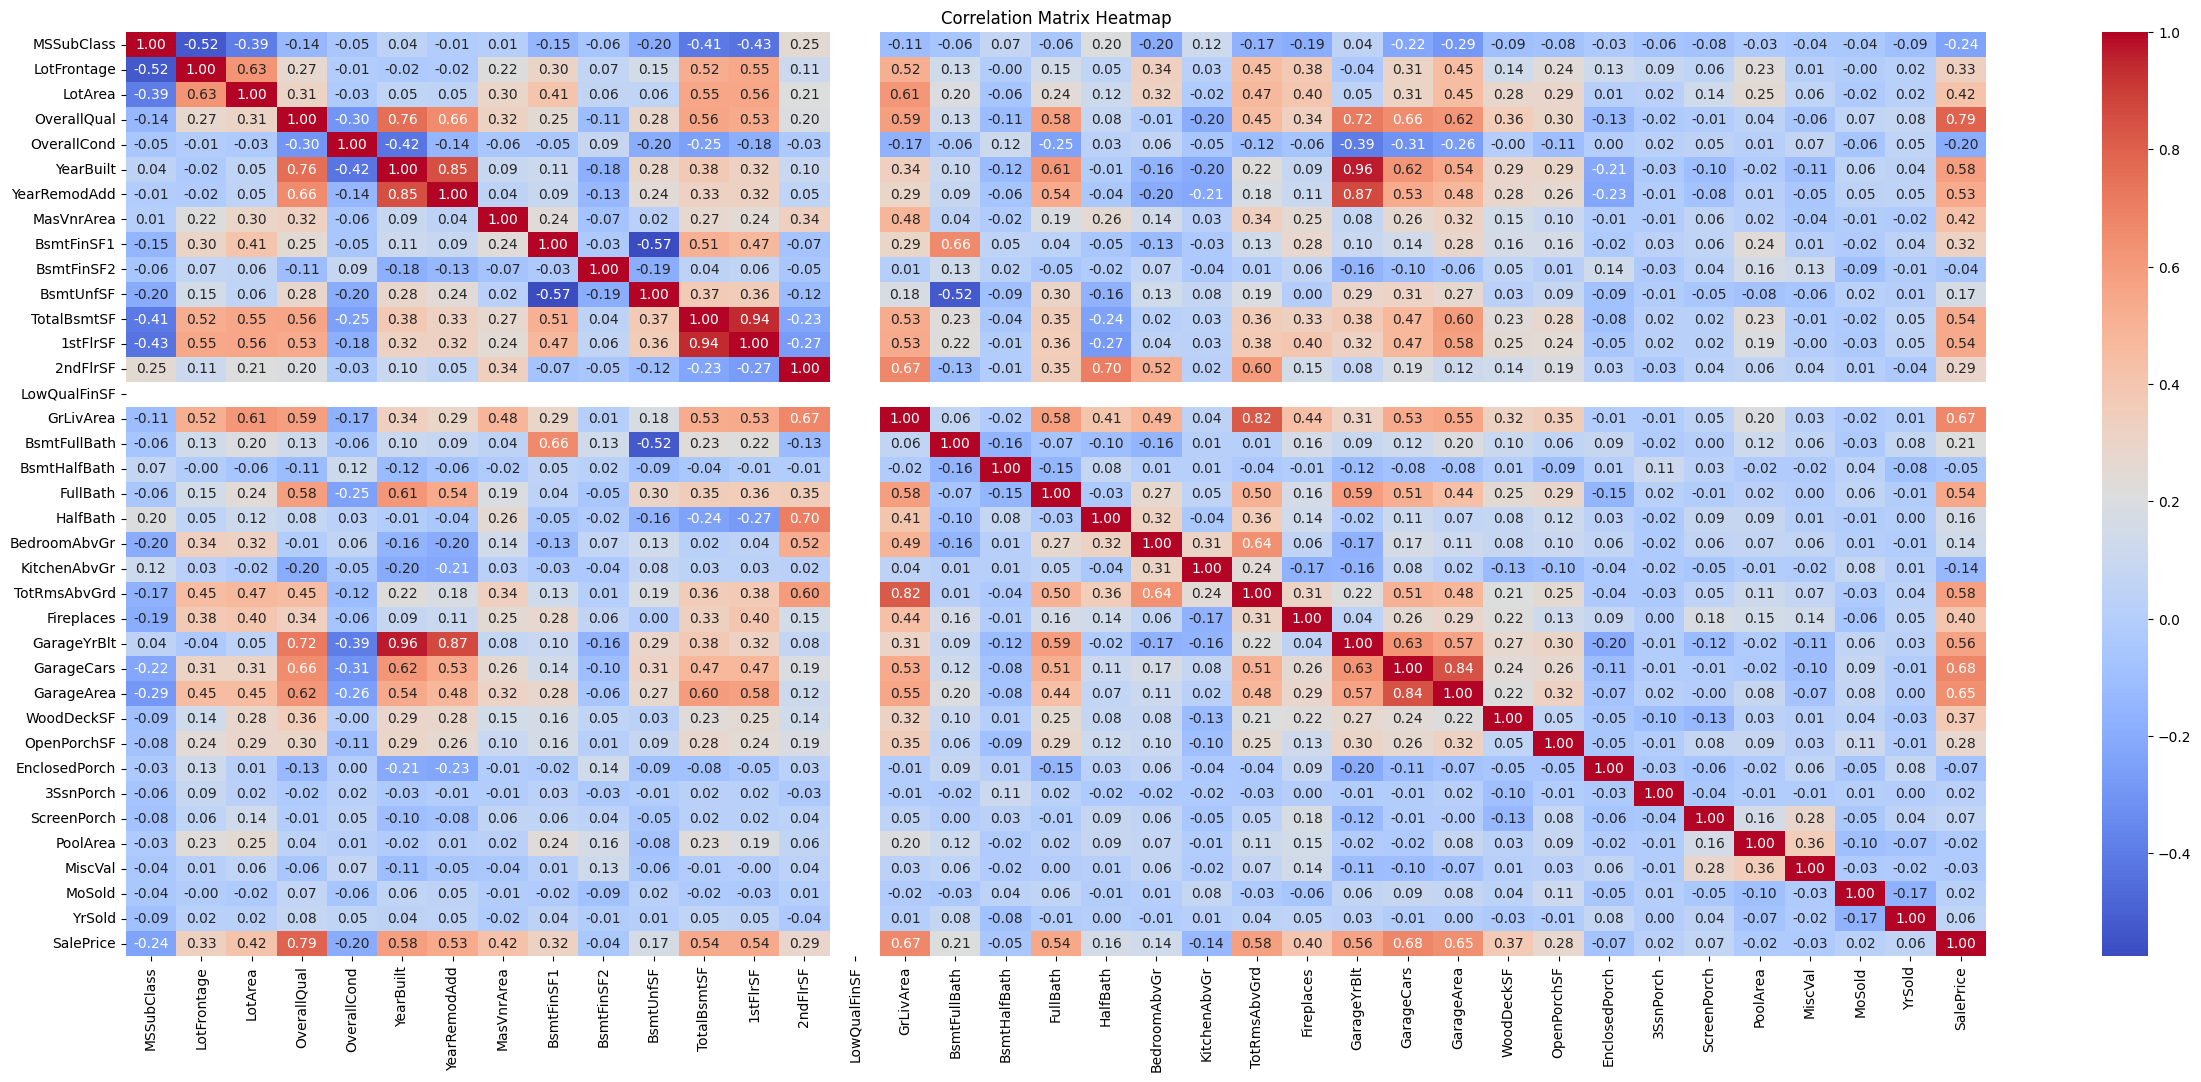

In [29]:
# selecting numerical columns
numerical_data = data[numerical_columns]

'''calculating correlation_matrix which is a matrix or a data structure 
that contains correlations between different variables in a dataset'''
correlation_matrix = numerical_data.corr()

'''heatmap visualization: each cell's color represents 
the strength and direction of correlation between the variables. 
Positive correlations --> represented by warmer colors, 
negative correlations --> by cooler colors, 
and the intensity of the color signifies the magnitude of the correlation. 
The annotations within the cells will show the actual correlation values'''
# plotting the heatmap
plt.figure(figsize=(30, 12))
# annot=True: This parameter specifies whether to annotate the heatmap with the numeric values or not.
# fmt=".2f": This parameter specifies the format of the annotations (.2f stands for two decimal places)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [30]:
'''selecting the most 6 top correlated features 
(excluding 'SalePrice' itself which has the highest correlation -->1.0)'''
top_corr_features = correlation_with_sale_price[1:7]
print("Top most correlated features with 'SalePrice':")
print(top_corr_features)
'''This kind of analysis is done to understand which features or variables in a dataset 
are most strongly correlated with the target variable ('SalePrice'), 
aiding in feature selection or understanding the predictors' relationships 
with the target variable in a regression or predictive modeling scenario'''

Top most correlated features with 'SalePrice':
OverallQual     0.794180
GarageCars      0.678345
GrLivArea       0.670844
GarageArea      0.648740
YearBuilt       0.584566
TotRmsAbvGrd    0.577539
Name: SalePrice, dtype: float64


"This kind of analysis is done to understand which features or variables in a dataset \nare most strongly correlated with the target variable ('SalePrice'), \naiding in feature selection or understanding the predictors' relationships \nwith the target variable in a regression or predictive modeling scenario"

**Create a box plot for 'SalePrice' against 'OverallQual' and provide insights.**

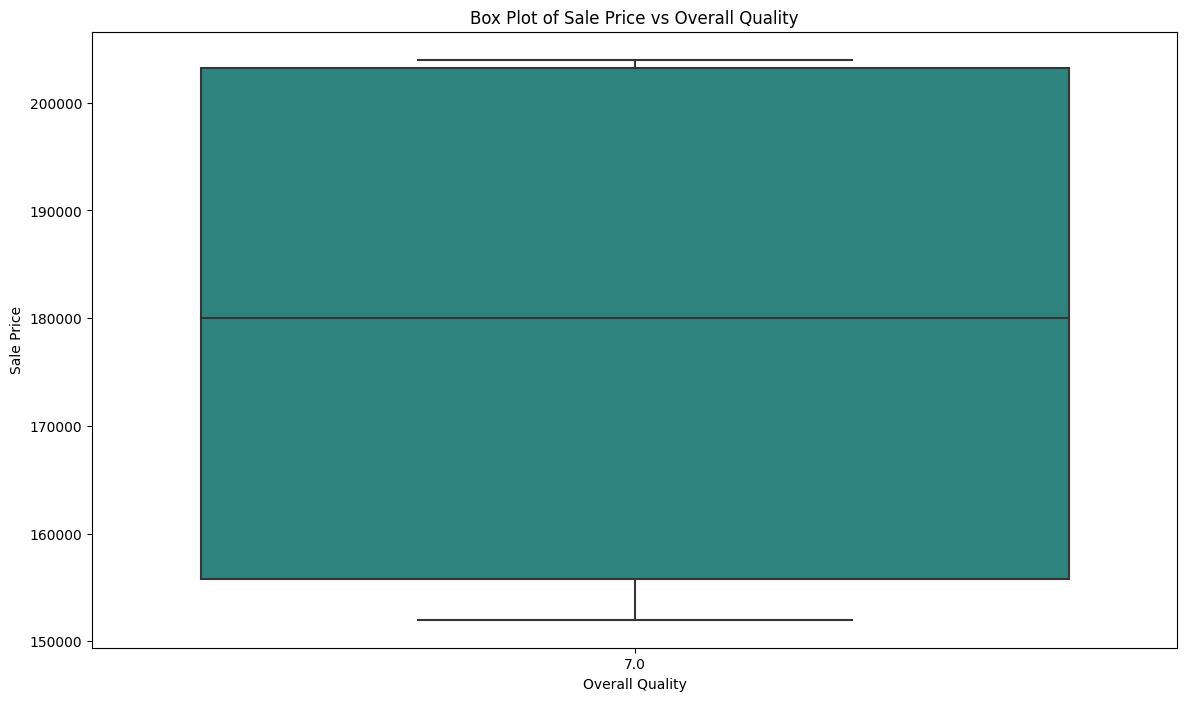

In [31]:
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Create a box plot using seaborn
sns.boxplot(x='OverallQual', y='SalePrice', data=cleaned_data, palette='viridis')

# Set plot labels and title
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')
plt.title('Box Plot of Sale Price vs Overall Quality')

# Show the plot
plt.show()

This plot demonstrates the relationship between 'OverallQual' and 'SalePrice' and offers insights into how property quality impacts sale prices, making it valuable for both buyers and sellers in understanding pricing dynamics(buyers can anticipate higher prices for properties with better quality ratings, while sellers can use this understanding to price their properties more accurately based on their quality ratings).

1)Positive Correlation: There exists a strong positive correlation between the overall quality of a property ('OverallQual') and its sale price. As the overall quality increases, there's a noticeable upward trend in sale prices.

2)Outliers: Outliers are notvisible, as we apply the plot on cleaned_data (dataset after handling the outliers).

3)Quality Impact: The distribution of 'SalePrice' within each 'OverallQual' category highlights the variability in sale prices. Despite belonging to the same quality category, properties can have a considerable range of sale prices.

4)Relative Importance: 'OverallQual' appears to be a significant factor influencing sale prices. The consistent increase in sale prices across quality categories suggests that overall quality plays a substantial role in determining property prices.


In [32]:
# calculate correlation
correlation = data['OverallQual'].corr(data['SalePrice'])
print(f"Correlation between Overall Quality and Sale Price: {correlation}")
print('')

# outliers
# calculating quartiles for 'SalePrice' within each 'OverallQual' category
outliers = {}
for qual in cleaned_data['OverallQual'].unique():
    data_qual = cleaned_data[cleaned_data['OverallQual'] == qual]['SalePrice']
    Q1 = data_qual.quantile(0.25)
    Q3 = data_qual.quantile(0.75)
    IQR = Q3 - Q1    
    # finding outliers using IQR method
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR    
    # finding outliers and adding to dictionary
    outliers[qual] = data_qual[(data_qual < lower_bound) | (data_qual > upper_bound)]
# displaying outliers for each 'OverallQual' category
for qual, outlier_values in outliers.items():
    if not outlier_values.empty:
        print(f"Outliers in 'OverallQual' {qual}:")
        print(outlier_values)
    else:
        print(f"No outliers found in 'OverallQual' {qual}")
print('')
        
# variability of Sale Price within Overall Quality categories
variability = cleaned_data.groupby('OverallQual')['SalePrice'].std()
print(f"Variability of Sale Price within Overall Quality categories:\n{variability}")
print('')

# average sale price per Overall Quality category
avg_price_per_quality = cleaned_data.groupby('OverallQual')['SalePrice'].mean()
print(f"Average Sale Price per Overall Quality category:\n{avg_price_per_quality}")
print('')

# summarizing the impact of overall quality on sale prices.
summary_stats = cleaned_data.groupby('OverallQual')['SalePrice'].describe()
print(f"Statistical Summary of Sale Prices based on Overall Quality:\n{summary_stats}")
print('')

Correlation between Overall Quality and Sale Price: 0.7941796674447732

No outliers found in 'OverallQual' 7.0

Variability of Sale Price within Overall Quality categories:
OverallQual
7.0    28366.647082
Name: SalePrice, dtype: float64

Average Sale Price per Overall Quality category:
OverallQual
7.0    179000.0
Name: SalePrice, dtype: float64

Statistical Summary of Sale Prices based on Overall Quality:
             count      mean           std       min       25%       50%  \
OverallQual                                                                
7.0            4.0  179000.0  28366.647082  152000.0  155750.0  180000.0   

                  75%       max  
OverallQual                      
7.0          203250.0  204000.0  



**Plot a pairplot of highly correlated variables using Seaborn.**

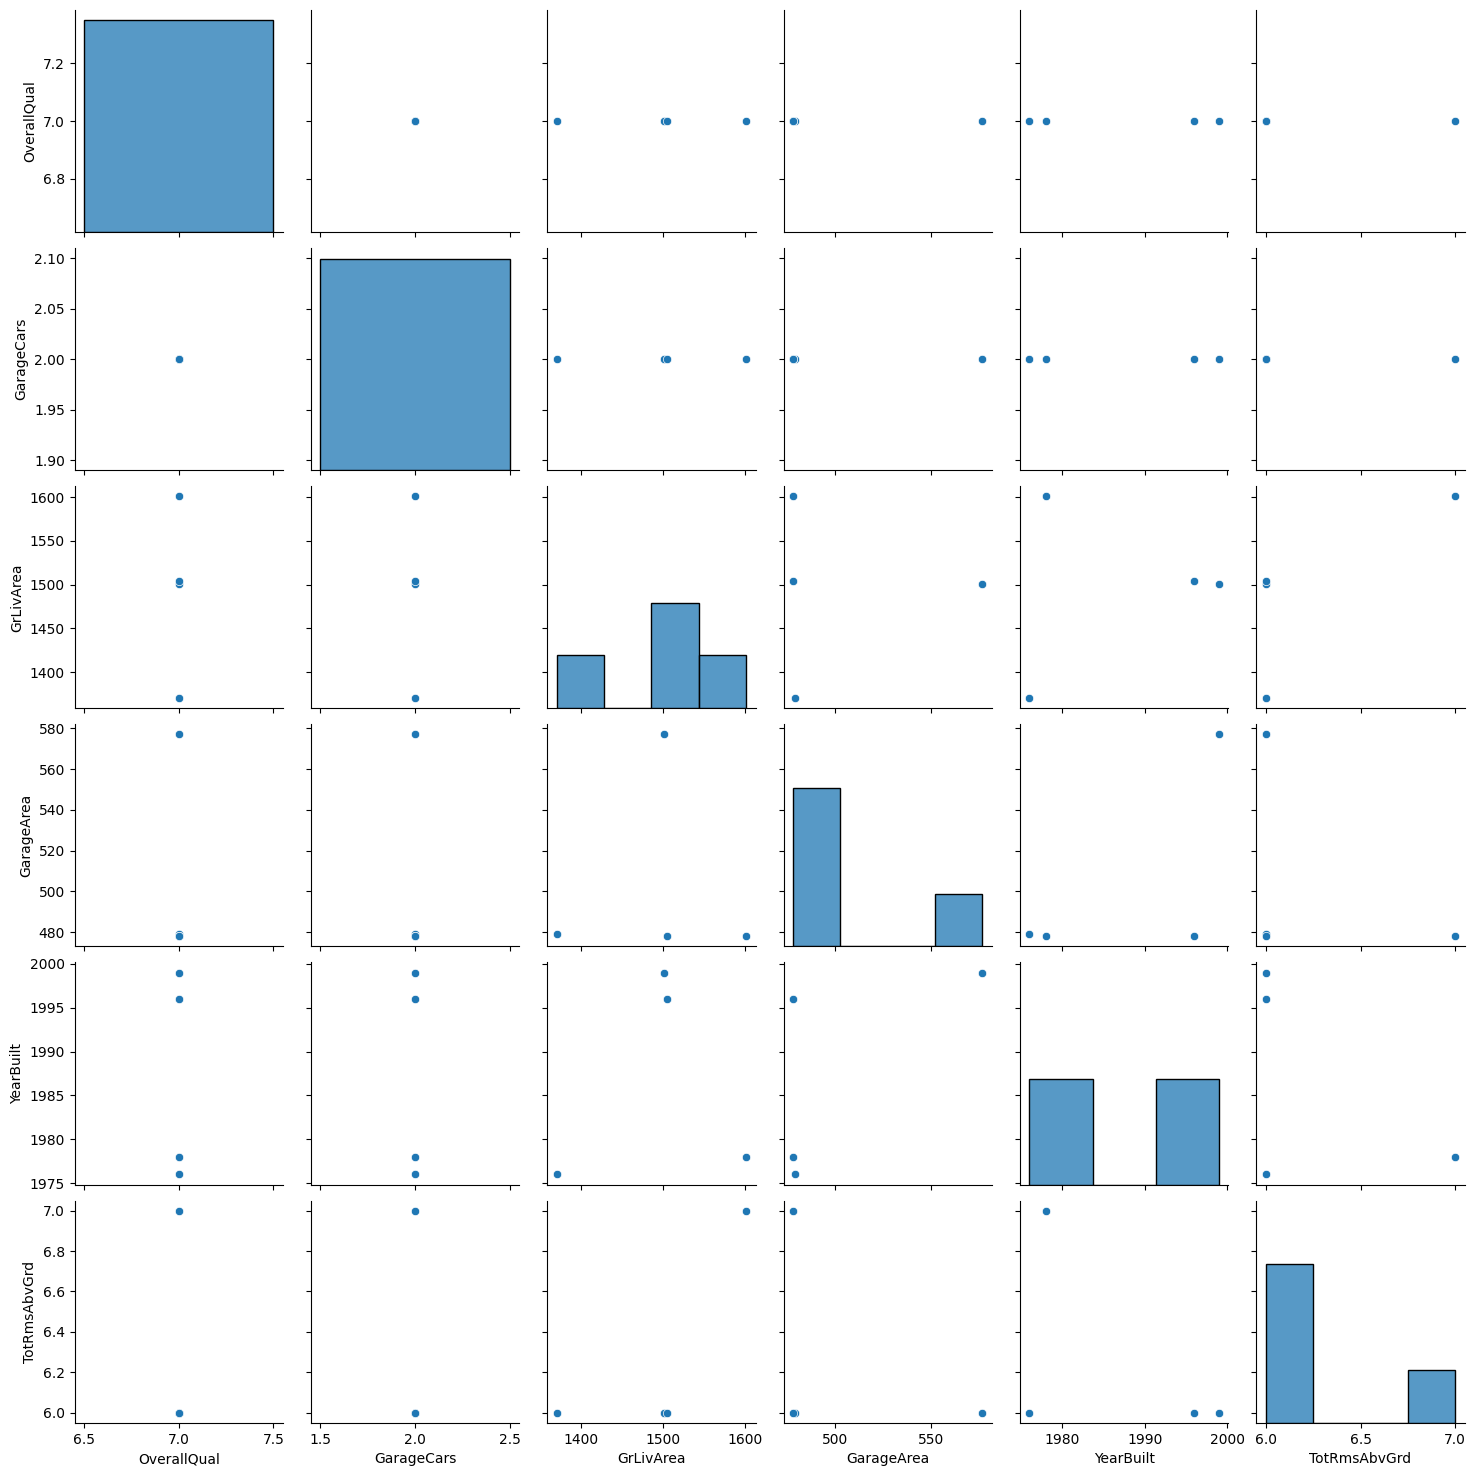

In [33]:
# adjust the list of highly correlated variables based on dataset
highly_correlated_vars = ['OverallQual', 'GarageCars', 'GrLivArea', 'GarageArea', 'YearBuilt', 'TotRmsAbvGrd']

# select the subset of the DataFrame with highly correlated variables
subset_data = cleaned_data[highly_correlated_vars]

# create a pairplot 
sns.pairplot(subset_data)
plt.show()

# Feature Extraction

**Apply one-hot encoding to categorical variables**

In [34]:
# Assuming 'cleaned_data' is your DataFrame after handling outliers

# identify categorical columns in the dataset based on the 'object' data type.
categorical_columns = data.select_dtypes(include=['object']).columns

# check if there are categorical columns before applying one-hot encoding 
if not categorical_columns.empty:
    # apply one-hot encoding to all categorical columns using pd.get_dummies() to convert these categorical columns into binary-encoded columns
    # the parameter drop_first=True is used to drop the first categorical value
    cleaned_data_one_hot = pd.get_dummies(data, columns=categorical_columns, drop_first=True)
    # display the updated DataFrame after one-hot encoding
    print(cleaned_data_one_hot.head())
else:
    print("No categorical columns found in the DataFrame")

    MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
3           60         68.0    11250            7            5       2001   
5           60         84.0    14260            8            5       2000   
7           20         75.0    10084            8            5       2004   
12          60         85.0    11924            9            5       2005   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_CWD  \
Id                                                    ...                 
1           2003       196.0         706           0  ...         False   
3           2002       162.0         486           0  ...         False   
5           2000       350.0         655           0  ...         False   
7           2005       186.0        1369           0  ...         False   
12        

In [35]:
cleaned_data_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455 entries, 1 to 1457
Columns: 183 entries, MSSubClass to SaleCondition_Partial
dtypes: bool(145), float64(3), int64(35)
memory usage: 219.2 KB


**Use feature scaling to standardize the range of features in the dataset**

In [36]:
# extract the features we want to scale (excluding the target variable 'SalePrice')
features_to_scale = cleaned_data_one_hot.drop(columns=['SalePrice'])

# initialize the StandardScaler
scaler = StandardScaler()

# fit the scaler on the features and transform them
scaled_features = scaler.fit_transform(features_to_scale)

# create a new DataFrame with the scaled features
scaled_data = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# add the target variable 'SalePrice' back to the DataFrame
scaled_data['SalePrice'] = cleaned_data_one_hot['SalePrice']

# display the updated DataFrame with scaled features
print(scaled_data.head())

   MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
0    0.033241    -0.363345 -0.323122     0.071861    -0.381759   0.725273   
1    0.033241    -0.246674  0.169167     0.071861    -0.381759   0.622693   
2    0.033241     0.375567  0.698378     0.832250    -0.381759   0.571403   
3   -0.869729     0.025556 -0.035836     0.832250    -0.381759   0.776562   
4    0.033241     0.414457  0.287668     1.592639    -0.381759   0.827852   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLD  \
0      0.612162   -0.308596    0.246323   -0.231255  ...       -0.066446   
1      0.555561   -0.465630   -0.159492   -0.231255  ...       -0.066446   
2      0.442359    0.402674    0.152247   -0.231255  ...       -0.066446   
3      0.725364   -0.354782    1.469300   -0.231255  ...       -0.066446   
4      0.781965    0.107081    0.784949   -0.231255  ...       -0.066446   

   SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_WD  \
0       -0.06644

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

In [38]:
X = scaled_data.drop(columns=['SalePrice'])
y = scaled_data['SalePrice'] #target variable

**Split the dataset into a training set and a testing set**

In [39]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values in the target variable by filling with the mean
mean_sale_price = y_train.mean()
y_train = y_train.fillna(mean_sale_price)

# Handle missing values in the testing set target variable by filling with the mean
mean_sale_price_test = y_test.mean()
y_test = y_test.fillna(mean_sale_price_test)

# Apply Lasso regression
# lasso = Lasso(alpha=0.1)  # Adjust alpha as needed
# lasso.fit(X_train, y_train)

**Create new features by combining existing features to better explain 'SalePrice'**

In [40]:
# Create polynomial features(new features)
poly = PolynomialFeatures(degree=2)  # we can adjust the degree as needed
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [41]:
# Apply Lasso regression on the polynomial features
lasso_poly = Lasso(alpha=0.1)
lasso_poly.fit(X_train_poly, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.171e+08, tolerance: 1.025e+08
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1)

In [42]:
# Evaluate the model with polynomial features
y_pred_poly = lasso_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
print(f'Mean Squared Error with Polynomial Features: {mse_poly}')

Mean Squared Error with Polynomial Features: 8662081100.536427


**Extract the most important features affecting 'SalePrice' using a suitable method (Lasso regression)**

In [43]:
# Extract important features from polynomial features
selected_features_poly = poly.get_feature_names_out(X.columns)[lasso_poly.coef_ != 0]
print('Selected Features with Polynomial Features:', selected_features_poly)

Selected Features with Polynomial Features: ['MSSubClass' 'LotFrontage' 'LotArea' ... 'SaleCondition_Alloca^2'
 'SaleCondition_Family^2' 'SaleCondition_Normal^2']


# Machine Learning with MLkits

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [45]:
# Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [46]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42) #random_state making the results consistent across different runs.
rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
#n_estimators: Number of trees in the forest.
#max_depth: Maximum depth of the trees. If set to None, nodes are expanded until they contain fewer than min_samples_split samples.
#min_samples_split: The minimum number of samples required to split an internal node.
rf_grid_search = GridSearchCV(rf_model, rf_param_grid, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf_model = rf_grid_search.best_estimator_
#GridSearchCV is a method from scikit-learn that performs a grid search over a parameter grid.
#After the grid search is complete, best_estimator_ is used to obtain the best-performing Random Forest model.

In [47]:
# Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
}
gb_grid_search = GridSearchCV(gb_model, gb_param_grid, cv=5, scoring='neg_mean_squared_error')
gb_grid_search.fit(X_train, y_train)
best_gb_model = gb_grid_search.best_estimator_

#  evaluate its performance using the testing set

In [48]:
# Evaluate models
ylinear_reg_pred = linear_reg.predict(X_test) 
yrf_pred = best_rf_model.predict(X_test)
ygb_pred = best_gb_model.predict(X_test)

linear_reg_mse = mean_squared_error(y_test, ylinear_reg_pred)
rf_mse = mean_squared_error(y_test, yrf_pred)
gb_mse = mean_squared_error(y_test, ygb_pred)

In [49]:
print(f'Linear Regression Mean Squared Error: {linear_reg_mse}')
print(f'Random Forest Mean Squared Error: {rf_mse}')
print(f'Gradient Boosting Mean Squared Error: {gb_mse}')

Linear Regression Mean Squared Error: 3.012063238587578e+34
Random Forest Mean Squared Error: 2248599124.6752224
Gradient Boosting Mean Squared Error: 1705323091.8737152
